# 실습 설명
워싱턴 D.C. 지역의 자전거 대여량을 예측하는 머신러닝 프로젝트를 시작해 봅시다. 데이터에는 자전거 대여 시간, 날씨 정보, 계절, 휴일 여부 등 다양한 정보가 담겨 있어요. 우리의 목표는 이 데이터를 분석하여 어떤 요인들이 자전거 대여량에 영향을 미치는지 알아보고, 이를 기반으로 미래의 대여 수요를 예측하는 모델을 만드는 것입니다. 앞으로 데이터를 정제하고, 머신 러닝 모델을 훈련시키며, 예측 결과를 평가해 보는 과정을 함께 진행해 볼 거예요. 
## 데이터 설명 
이번 프로젝트에서는 Kaggle의 자전거 수요 예측 경진대회에서 제공한 데이터를 사용합니다. 이번에 다루게 될 데이터 파일은 총 3개인데요. 훈련 데이터 train.csv, 테스트 데이터 test.csv, 그리고 Kaggle에 제출할 답안지 역할을 하는 sampleSubmission.csv 입니다. 각 컬럼의 의미는 아래에 설명해 둘 테니 참고해 주세요.
- datetime: 자전거 대여 일시 (연도-월-일-시간 형태)
- season: 계절을 나타내는 변수
- holiday: 공휴일 여부
- workingday : 근무일 여부
- temp: 섭씨 온도
- atemp: 체감 섭씨 온도
- humidity: 습도
- windspeed: 풍속
- registered: 정기권 회원 이용자의 대여량
- casual: 비회원 이용자의 대여량
- count: 총 대여량(회원과 비회원의 대여량 합)

## 평가 함수 설명
우리가 제출하는 답안을 평가하는 데 사용하는 공식을 '평가 함수'라고 하는데요. 우리가 참여할 Kaggle 경진대회에서는 RMSLE라는 평가 함수를 사용합니다. RMSLE(Root Mean Squared Logarithmic Error)는 회귀 모델의 예측 성능을 평가하는 데 사용되는 손실 함수 중 하나인데요. 실제 값과 예측 값 사이의 로그 차이의 제곱을 평균한 값의 제곱근으로 계산됩니다. 수식으로 나타내면 다음과 같아요. 참고로 여기서 ai 는 실제 답, pi 는 우리가 예측한 값을 나타냅니다.

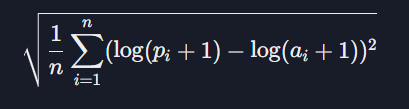

## 가이드라인
1. 데이터 불러오기
train.csv, test.csv, sampleSubmission.csv 파일을 DataFrame으로 불러옵시다.
2. 데이터 탐색
각 파일별 데이터 개수, 컬럼별 데이터 타입, 통계 정보, 결측값 존재 여부 등을 확인해 보세요.
object 타입의 변수인 datetime 을 좀 더 다루기 쉽게 다른 타입의 변수로 변환해 보세요.
각 변수들 간의 상관관계를 분석해 보세요.
3. 베이스라인 모델 만들기
훈련 데이터를 훈련 셋과 검증 셋으로 분할해 주세요.
선형 회귀 모델을 사용하여 모델 학습을 진행하고, 검증 셋으로 모델 성능을 확인해 보세요.
4. 모델 개선하기
변수들에 대해 추가적으로 탐색해 보면서 모델 개선에 도움이 될 만한 피쳐 엔지니어링 작업을 진행해 보세요. 예를 들어 아래와 같은 작업을 해 볼 수 있습니다.
이상치 존재 여부를 확인해 보고, 이상치가 있는 변수는 전처리 작업을 진행해 보세요.
날짜의 유형을 분류할 수 있는 파생 피쳐를 추가하여 모델의 성능을 개선해 보세요.
평균 값을 이용한 파생 피쳐를 추가하여 모델의 성능을 개선해 보세요.
모델 성능에 도움이 안 될 것 같은 변수는 제거해 보세요.
타겟 값에 로그 변환 방법을 적용해서 학습을 진행해 보세요.
다양한 머신 러닝 알고리즘을 사용해서 모델의 성능을 비교해 보세요 (예: RandomForestRegressor)
하이퍼파라미터를 조정하여 모델의 성능을 높여 보세요.
모델의 성능을 높일 수 있는 추가적인 아이디어가 있다면 원하는 대로 자유롭게 시도해 보세요!

### 답안 제출 방식 설명
여러분이 머신 러닝 모델을 만들고 답안 파일을 만든 다음에는 이 답안을 평가해 줄 사이트가 필요한데요. 이번 프로젝트에서는 데이터를 제공한 출처인 Kaggle의 [자전거 수요 예측 경진대회](https://www.kaggle.com/competitions/bike-sharing-demand)에 답안을 제출할 예정입니다. Kaggle 경진대회 참여 방법과 답안 제출 방법은 아래 튜토리얼 링크를 참고하세요.

[Kaggle Competitions 참가 및 답안 제출 방법](https://www.codeit.kr/tutorials/152/Kaggle-Competitions)

# 1. 데이터 불러오기 / 데이터 탐색
### 1. 라이브러리 불러오기


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data불러오기 

In [30]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
submission_df = pd.read_csv('data/sampleSubmission.csv')

### 3. 훈련 데이터와 테스트 데이터 탐색하기

두개의 컬럼사이즈가 다른것을 확인

In [31]:
print(train_df.shape)
test_df.shape

(10886, 12)


(6493, 9)

훈련 데이터는 10,886개의 로우, 12개의 컬럼을 가진 DataFrame이고, 테스트 데이터는 6,493개의 로우, 9개의 컬럼을 가진 DataFrame이네요. 테스트 데이터의 컬럼은 훈련 데이터보다 3개가 적은데, 어떤 컬럼이 빠진 걸까요? train_df 와 test_df 각각이 어떤 컬럼들로 구성되어 있는지 확인해 봅시다.

In [32]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [33]:
test_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

train dataset에는 3컬럼이 추가로 더 있음 
``` 'windspeed', 'casual', 'registered', 'count'```

In [34]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [35]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


datetime이라는 변수는 object 타입이고, 나머지 11개의 변수는 정수형(int64) 혹은 실수형(float64) 변수라는 것을 알 수 있군요. 그리고 총 10,886개의 로우가 있는데, 모든 변수들의 Non-Null Count 값이 10,886개로 동일합니다! 즉, 훈련 데이터에는 결측값이 아예 없다는 걸 알 수 있네요.

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


describe() 함수를 이용해 통계 정보를 확인

In [37]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


include='object'를 이용해서 datetime 전체 개수와 유니크한 개수를 확인해서 중복등장없이 한번씩만 등장한다는것을 알수 있음. 

In [38]:
train_df.describe(include='object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


### 4. datetime 변수 분해하기

datetime변수는 object타입이고, 연도-월-일 시간:분:초 형식으로 되어 있는데요. 이후에 EDA나 모델 학습을 좀 더 원활하게 진행할 수 있도록, datetime을 year, month, day, hour, minute, second 이렇게 6개의 변수로 분해해 보겠습니다.

In [39]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['minute'] = train_df['datetime'].dt.minute
train_df['second'] = train_df['datetime'].dt.second
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


minute와 second의 모든 값이 0인데요. 즉,datetime은 1시, 2시, 3시… 이런 식의 한 시간 단위로 기록되어 있다고 할 수 있습니다. 따라서 minute와 second는 삭제를 해도 무방하겠네요! 그렇다면 drop() 함수를 이용해서 minute와 second 컬럼을 지워 줍시다. 그리고 columns속성을 통해 두 변수가 제대로 제거되었는지 확인해 볼게요.

In [40]:
train_df = train_df.drop(['minute', 'second'], axis=1)
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

두 변수 minute, second가 잘 삭제되었다는 것을 확인할 수 있습니다. 여기서 주의할 점은 훈련 데이터와 테스트 데이터를 같은 형태로 관리해 줘야 한다는 건데요. minute , second 변수는 어차피 앞으로 사용하지 않을 거니까, test_df에는 처음부터 4개의 변수 year, month, day, hour만 추가해 주도록 하겠습니다.

In [41]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'])
test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['hour'] = test_df['datetime'].dt.hour

### 5. 상관 계수 행렬 확인하기

각 변수들의 상관관계를 분석하면, 변수의 특성을 파악하거나 모델의 성능을 높일 때 도움이 되는 힌트를 얻을 수 있는데요. 아래와 같이 변수들 간의 상관 계수를 계산해서 히트맵으로 시각화해 볼게요. 상관 계수의 절댓값이 클수록 색깔이 더 진해지게 함으로써, 강한 상관관계를 가진 변수 쌍을 더 쉽게 식별할 수 있도록 해 봅시다.

이를 위해 vmax와 vmin라는 파라미터 값을 설정할 건데요. 여기서 vmax와 vmin은 히트맵에서 사용할 색상 스케일의 상한과 하한을 정의하는 역할을 합니다. 예를 들어 vmax는 1로 설정해서 히트맵의 색상 스케일이 가장 진한 색으로 표현되는 최댓값을 1로 지정할 수 있어요. vmin 는 정반대로 -1로 설정할게요. 이렇게 설정하면 vmax와 vmin의 중간에 위치한 0 주변인 값들은 비교적 흐릿하게 보이게 할 수 있습니다.

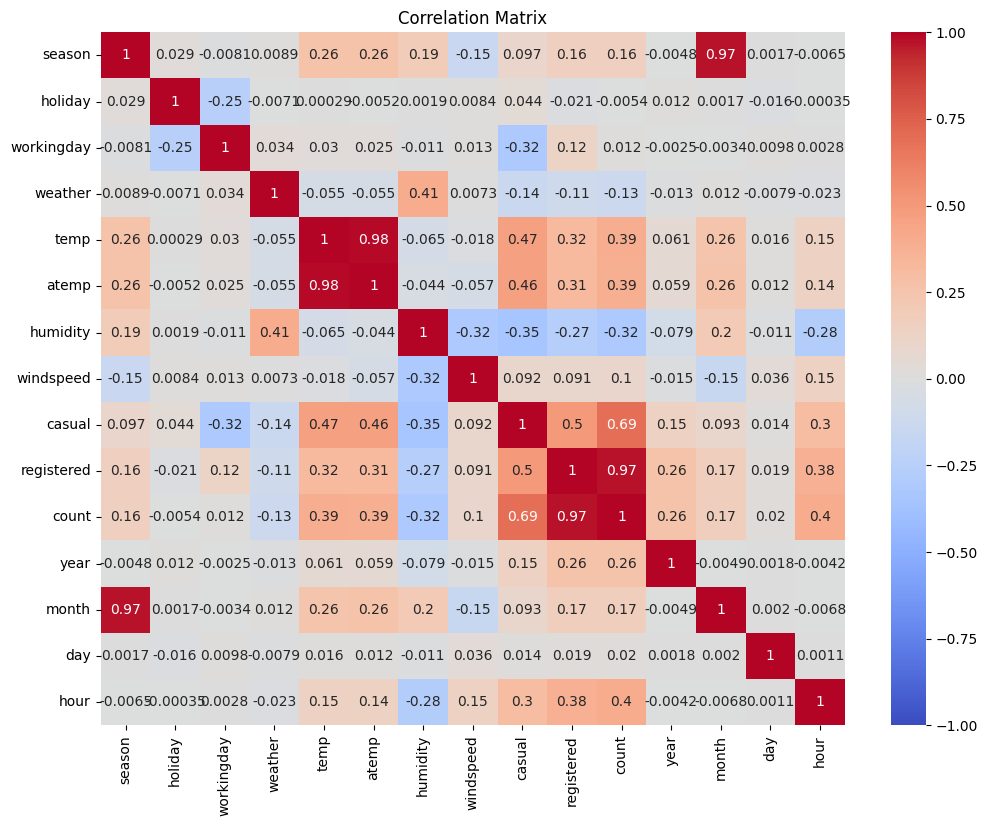

In [42]:
df = pd.DataFrame(train_df)

# 상관 계수 계산
correlation_matrix = df.corr()

# 상관 계수 히트맵 시각화
plt.figure(figsize=(12,9))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, center=0, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

참고로 지금 palette는 'coolwarm'으로 설정해 준 상태로, 양의 상관 계수를 가지는 변수 쌍은 빨간색, 음의 상관 계수를 가지는 변수 쌍은 파란색으로 표시가 됩니다. 또, 상관 계수의 크기가 클수록 색깔은 진해지는 것을 볼 수 있어요.

예를 들어, 좌측 상단에 굉장히 진한 빨간색으로 표시되어 있는 ```temp```와 ```atemp``` 가 눈에 들어오는데요. 이 둘은 0.98이라는 높은 상관 계수를 가지고 있어요. 일반적으로 실제 온도가 높을수록 체감 온도도 높기 때문에 이는 당연해 보입니다. 그리고 ```humidity```와 ```count```는 -0.32로, 음의 상관관계를 가지고 있네요. 즉, 습도가 높아질수록 자전거 대여량은 감소하는 경향이 있다는 것을 알 수 있습니다.

마지막으로, 우리가 예측해야 하는 값인 count와 연관성이 높은 변수도 찾아볼까요? hour가 0.4로 가장 큰 상관 계수를 보입니다. 즉, 자전거 대여량은 시간과도 관련이 높다는 걸 알 수 있네요.

## 2. 답안지 파일 살펴보기
이제 캐글 사이트에 제출해야 하는 '답안지'에 해당하는 submission_df도 살펴봅시다. 먼저 shape 속성을 통해 데이터의 크기를 알아볼게요.

In [43]:
submission_df.shape

(6493, 2)

테스트 데이터와 동일하게 6,493개의 로우가 있고 컬럼은 2개가 있다는 걸 알 수 있네요. 다음으로는 head() 함수를 이용해 데이터가 대략 어떻게 생겼는지도 살펴 봅시다.

In [44]:
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


출력 결과를 보면, datetime과 count 컬럼이 있는데요. 이전에 훈련 데이터에서 확인했듯이 datetime 값은 한 시간 단위로 되어 있는 것을 알 수 있습니다. 반면 count 값들은 다 0으로 적혀 있어요. 우리는 각각의 datetime마다 자전거 대여량을 예측하여, 그 값을 count 컬럼에 채워 주도록 하겠습니다.

# 2.모델링
지금까지 훈련 데이터와 테스트 데이터의 EDA를 진행한 후 간단한 전처리 작업을 진행했습니다. 이제 이 훈련 데이터를 가지고 실제로 학습을 진행한 이후에, 테스트 데이터를 통해 모델의 성능을 확인해 볼게요.

## 입력 변수 타겟 변수 분리하기 

지금까지 우리가 다루고 있던 훈련 데이터는 '입력 변수'와 '타겟 변수'를 모두 포함하고 있는 DataFrame이었어요. 여기서 '입력 변수'는 모델이 학습하는 데 사용되는 변수들을 나타내고, '타겟 변수'는 모델이 예측해야 하는 값을 나타내는데요. 입력 변수들을 이용하여 타겟 변수 값을 예측하는 게 우리 모델이 할 일이에요.

실제 모델 학습 과정에서는 기존의 훈련 데이터를 입력 변수와 타겟 변수로 나누는 작업이 필요한데요. 지금부터는 훈련 데이터를 입력 변수X와 타겟 변수y로 분리해 봅시다. 일단 X에서 타겟 변수인 count를 제거해 볼게요.

In [45]:
X = train_df.drop(columns='count')
y = train_df['count']

이어서, 추가로 불필요한 변수들도 몇 개 제거해 보겠습니다. 모델 학습을 시킬 때 주의해야 할 점은 테스트 데이터에서 사용되지 않는 변수들을 훈련 데이터에서도 제거함으로써 두 데이터 사이에 일관성을 유지해야 한다는 거예요. 만약 어떤 컬럼이 훈련 데이터에만 존재하고, 테스트 데이터에는 없는 경우 오류가 발생할 것입니다. 이번 프로젝트에서는 casual, registered가 훈련 데이터에는 있지만, 테스트 데이터에는 없기 때문에 이 변수들을 제거해 줄게요.

그리고 datetime 변수를 가지고 이미 year, month, day, hour라는 변수를 추가했기 때문에, datetime 변수는 삭제해도 괜찮을 것 같네요. 지금까지의 내용을 코드로 작성하면 다음과 같습니다.

In [46]:
X = train_df.drop(columns=['count', 'casual', 'registered', 'datetime'])
y = train_df['count']

테스트 데이터는 X_test에 담아 줄 건데요. 훈련 데이터와 다르게, 테스트 데이터에는 count, casual, registered 변수가 원래 없기 때문에 datetime 변수만 따로 제거해 주면 끝입니다.

In [47]:
X_test = test_df.drop(columns=['datetime'])

모델을 학습시키기 전에, X, y, X_test가 잘 준비된 것이 맞는지 확인해 볼게요. 데이터의 크기와 결측값 개수를 확인해 볼 건데요.

In [48]:
print(f'Train data shape: {X.shape}')
print(f'Number of null values: {X.isna().sum().sum()}')
print(f'\nTest data shape: {X_test.shape}')
print(f'Number of null values: {X_test.isna().sum().sum()}')

Train data shape: (10886, 12)
Number of null values: 0

Test data shape: (6493, 12)
Number of null values: 0


출력 결과를 보면, X와 X_test의 컬럼 개수가 12개로 동일하고 결측값도 없다는 것을 알 수 있습니다. 이 DataFrame 그대로 학습을 진행해도 될 것 같네요.

지금까지 작업해 온 코드를 되돌아보면, 처음에는 모든 컬럼을 포함한 DataFrame 앞으로 계속 모델을 개선하면서 지금처럼 훈련 데이터와 테스트 데이터의 컬럼 구성을 수정하는 작업이 계속 반복될 예정입니다. 그래서 이를 위한 코드는 함수로 만들어 둘게요. 함수의 장점은 똑같은 기능을 하는 코드가 여러 번 필요할 때 같은 코드를 또 구현하는 대신 함수만 호출하면 되어서, 코드 구현이 간결해진다는 점이에요.

함수 두 개를 만들어 줄 건데요. 먼저 seperate_train() 함수는 모델 학습에 사용할 입력 변수들과 타겟 변수를 반환하는 역할을, seperate_test() 함수는 예측에 사용할 입력 변수들을 반환하는 역할을 합니다.

In [49]:
def separate_train(df): # 'count' 피쳐를 y로 구분
    X = df.drop(['datetime', 'casual', 'registered', 'count'], axis=1)
    y = df['count']
    return X, y

def separate_test(df): # 'count' 피쳐를 y로 구분
    X_test = df.drop('datetime', axis=1)
    return X_test

이제 방금 만든 함수가 잘 작동하는지 확인해 볼게요.

In [50]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

print(f'Train data shape: {X.shape}')
print(f'Number of null values: {X.isna().sum().sum()}')
print(f'\nTest data shape: {X_test.shape}')
print(f'Number of null values: {X_test.isna().sum().sum()}')

Train data shape: (10886, 12)
Number of null values: 0

Test data shape: (6493, 12)
Number of null values: 0


## 훈련 셋과 검증 셋 분할하기

지금부터는 훈련 데이터를 훈련 셋(training set)과 검증 셋(validation set)으로 분리해 볼게요. ```sklearn.model_selection```의 ```train_test_split()```를 사용해서 X와 y 각각에 대해 훈련 셋과 검증 셋으로 나누어 주겠습니다. 훈련 셋은 변수명 뒤에 '_train'을 붙이고, 검증 셋은 '_valid'를 붙여 저장할게요. 훈련 셋과 검증 셋 비율은 8:2로 설정하겠습니다.

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

## 훈련 셋으로 모델 학습하기
이제 학습에 사용할 모델을 불러 올게요. 일단 가장 기본적인 모델 중 하나인 선형 회귀 모델을 사용해 보겠습니다. ```sklearn.linear_model```의 ```LinearRegression```을 불러온 뒤, 모델을 만들어서 ```fit()``` 함수를 가지고 학습을 진행하면 되고요. ```fit()``` 함수에는 훈련 셋의 입력 변수 ```X_train```과 타겟 변수 ```y_train```를 파라미터로 넘겨주면 됩니다

In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 검증 셋으로 모델 성능 확인하기
지금부터는 검증 셋에 대한 예측 값을 구하고, 이 값을 실제 답과 비교하면서 모델의 성능을 확인해 봅시다. ```predict()``` 함수에, 미리 준비해 둔 ```X_valid```를 파라미터로 넘겨줄게요.

In [53]:
y_valid_pred = model.predict(X_valid)

그리고 이 프로젝트의 성능 평가 지표 'RMSLE'을 사용하여, 모델의 성능을 확인해 볼게요. 일단 sklearn의 metrics 모듈에 있는 ```mean_squared_log_error```를 이용하면 ```MSLE``` 값을 구할 수 있는데요. 여기에 루트를 씌우면 RMSLE 값이 됩니다. 아래와 같이 ```mean_square_log_error()``` 함수에 예측값 ```y_valid_pred```와 실제 답 ```y_valid```를 파라미터로 넘겨준 뒤, numpy의 ```sqrt()``` 함수를 사용하면 되겠죠?

In [54]:
from sklearn.metrics import mean_squared_log_error

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'\nValidation Data RMSLE: {rmsle:.5f}')

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

그런데 위 코드를 실행해 보면 '예측 값에 음의 값이 포함된 경우 MSLE를 계산할 수 없다'는 내용의 에러가 뜹니다. 모델이 구한 예측 값에 음수가 포함되어 있나 보네요. 당연히 자전거 대여량은 음수일 수 없으니, 음수로 예측한 값들은 전부 0으로 바꿔 줍시다. 아래와 같이 numpy의 maximum()함수를 사용하여, 0보다 작은 값은 0으로 대체하는 코드를 추가할게요.

In [55]:
y_valid_pred = np.maximum(0, y_valid_pred)

그리고 다시 코드를 실행해 보면 검증 셋에 대한 RMSLE 값은 1.43054라는 것을 알 수 있네요.

In [56]:
rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')

Validation Data RMSLE: 1.30575


## Kaggle에 답안 제출하기

드디어 이번 레슨의 마지막 미션입니다! 실제 테스트 데이터 셋을 가지고 답을 예측을 하여 Kaggle에 제출해 볼게요. X_test를 입력 변수로 사용하여 predict() 함수로 예측 값을 구해 보겠습니다. 이번에도 구한 값이 음수이면 0으로 대체하도록 할게요.

In [57]:
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(0, y_test_pred)

그 다음에는 submission_df의 count컬럼에 y_test_pred에 있는 값들을 채워 넣어 줄게요. 그리고 to_csv() 함수를 이용하여 submission_df을 'submission_baseline.csv'이라는 이름의 파일로 저장해 봅시다.

In [58]:
submission_df['count'] = y_test_pred
submission_df.to_csv('submission_baseline.csv', index=False)
submission_df 

,datetime,count
0,2011-01-20 00:00:00,0.000000
1,2011-01-20 01:00:00,0.000000
2,2011-01-20 02:00:00,0.000000
3,2011-01-20 03:00:00,0.000000
4,2011-01-20 04:00:00,0.000000
...,...,...
6488,2012-12-31 19:00:00,299.166115
6489,2012-12-31 20:00:00,307.029709
6490,2012-12-31 21:00:00,320.079545
6491,2012-12-31 22:00:00,338.774422


마지막으로 이 csv 파일을 Kaggle 사이트에 제출하여 모델의 성능을 확인해 보겠습니다. Kaggle 대회에 답안을 제출하는 방법에 대해서는 튜토리얼 링크를 참고해 주세요. 참고로 이 대회의 리더보드는 현재 업데이트가 중단되어 있어, 지금 제출을 하더라도 공식 순위가 매겨지지는 않아요. 제출 결과는 모델 성능을 확인할 때 참고로 활용해 주시면 됩니다.

Kaggle에 제출하여 나온 결과는 1.34066(RMSLE)이네요. 여기서 Public Score는 대회 데이터의 일부분만을 사용하여 계산되는 점수이고, Private Score는 대회 데이터의 나머지 부분(보통 테스트 데이터셋의 큰 비율)을 사용하여 계산되는 점수인데요. 이미 종료된 대회이기 때문에 지금은 Private Score 값과 Public Score 값이 똑같이 나옵니다.

# 3.피쳐 엔지니어링(Feature Engineering)
피쳐 엔지니어링이란, 머신 러닝 모델의 성능을 향상시키기 위해 원본 데이터의 변수를 가공하는 과정을 의미해요. 이때 결측값이나 이상점을 처리하기도 하고, 새로운 피쳐를 생성하거나 기존의 변수들을 결합하여 더 의미 있는 정보를 추출하기도 하죠. 피쳐 엔지니어링은 모델의 성능에 큰 영향을 미치는 아주 중요한 작업인데요. 그래서 이번 레슨부터는 각각의 변수에 대해 더 자세히 탐색해 보고, 이를 바탕으로 다양한 피쳐 엔지니어링을 진행하면서 모델의 성능을 올려 볼 예정입니다.

첫 번째 레슨에서 데이터를 전체적으로 간단히 살펴봤다면, 이번 레슨에서는 각 변수에 대해 좀 더 자세하게 살펴볼게요. 이 레슨에서는 count, year, month, temp 등 주요 변수들을 분석해 보겠습니다. 지금부터 진행하는 EDA(Exploratory Data Analysis)에는 다양한 정답이 있으니까, 지금부터 나오는 내용은 하나의 가이드라인으로 참고해 주시면 됩니다.

## count 변수의 분포 살펴보기
먼저 count 변수에 대해 살펴봅시다. count 변수는 자전거 대여량을 나타내는 변수인데요. 우리가 예측해야 하는 값이므로, 훈련 데이터에는 포함되어 있지만 테스트 데이터에는 포함되어 있지 않습니다. 먼저 데이터 분포를 확인하기 위해 히스토그램을 그려 볼게요. 이를 위해 seaborn의 histplot()을 사용해 보겠습니다. 참고로 bins라는 파라미터는 히스토그램의 막대 개수를 뜻하는데요. 파라미터 값은 여러분이 원하는 대로 설정하면 됩니다. 여기서는 10으로 설정할게요.

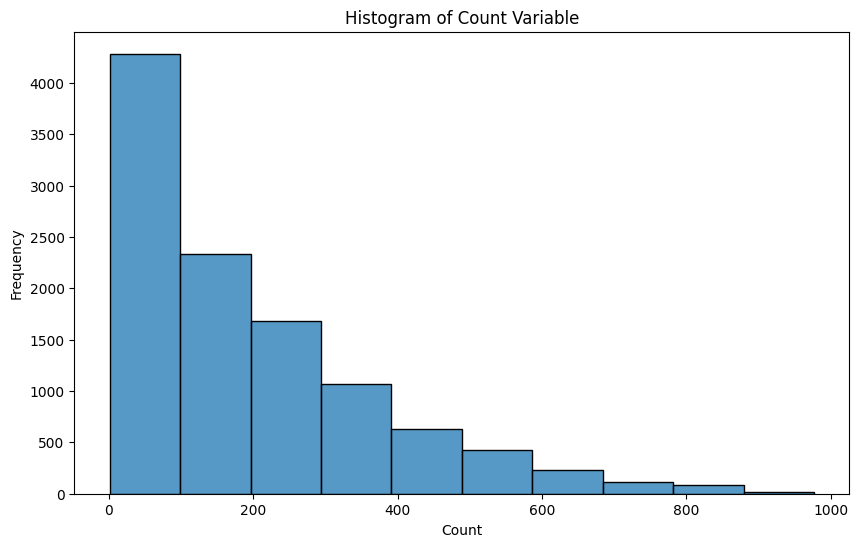

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='count', bins=10)
plt.title('Histogram of Count Variable')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()


count를 10개의 구간으로 쪼개서 확인을 해 보았는데요. 값이 증가할수록 그 빈도수도 같이 감소하고 있는데, 모양을 보면 오른쪽으로 꼬리가 쭉 늘어진 것 같은 느낌이 드네요. 이런 데이터는 '오른쪽으로 치우친(right-skewed)' 데이터라고 부릅니다. 다음에는 박스 플롯도 한번 그려 볼게요.

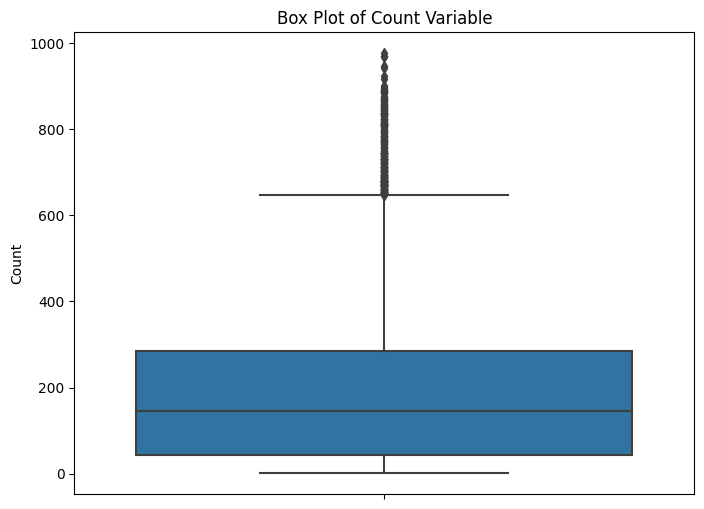

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df, y='count')
plt.title('Box Plot of Count Variable')
plt.ylabel('Count')
plt.show()

이를 통해 사분위수, 이상치 등을 확인할 수 있습니다. 그래프에서 수염의 아래 부분은 거의 0에 가까워 보이는데요. 그렇다면 count의 최솟값은 정확히 얼마일지 한번 확인해 보겠습니다.

In [61]:
train_df['count'].min()

1

count의 최솟값은 1이라는 걸 알 수 있네요. 참고로 데이터를 자세히 살펴보면 자전거 대여가 없는 시간대에는 count 값이 0으로 되어 있는게 아니라, 아예 그 시간대에 해당하는 행이 존재하지 않는다는 걸 알 수 있어요. 이 점을 참고해서, 나중에 테스트 데이터의 count 값을 채울 때 1 이상의 값으로 채워 주도록 하겠습니다.

## ```count```와 관련 있는 변수 찾기

지금까지 count 변수에 대해 살펴봤는데요. 이번에는 자전거 대여량에 영향을 줄 만한 변수로 어떤 것들이 있을지 상관 계수 값을 통해 간단히 확인해 보겠습니다.

일단 어떤 변수가 count 값과 관련성이 높은지 간단히 확인해 볼 수 있도록, 상관 계수에 절댓값을 씌워 줄게요. 그리고 값의 크기가 큰 것부터 작은 순서대로 내림차순 정렬해서 막대그래프를 그려 보겠습니다.

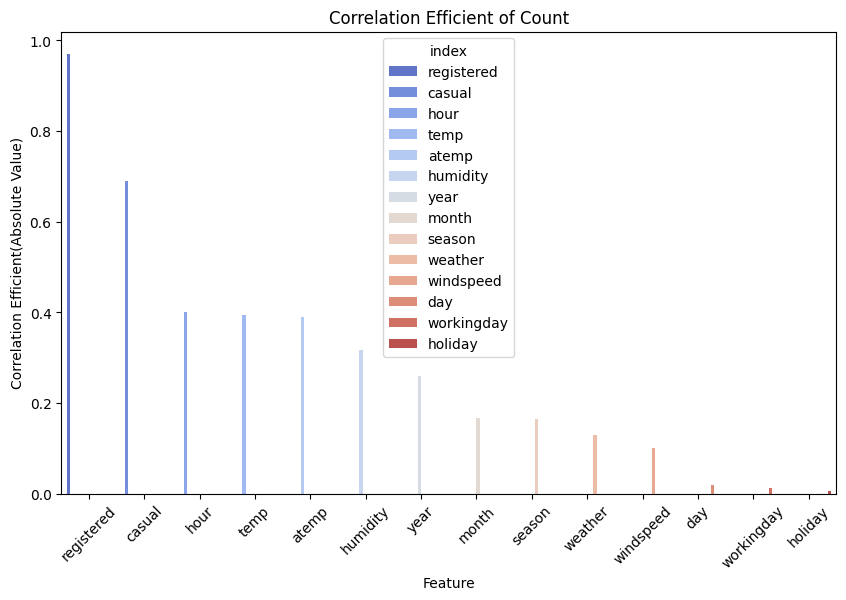

In [69]:
corr_df = correlation_matrix['count'].abs().sort_values(ascending=False).drop('count')

plt.figure(figsize=(10, 6))
sns.barplot(data=corr_df.reset_index(), x='index', y='count', hue='index', palette='coolwarm')


plt.xlabel('Feature')
plt.ylabel('Correlation Efficient(Absolute Value)')
plt.title('Correlation Efficient of Count')
plt.xticks(rotation=45)
plt.show()

## year, month, day, hour 변수별 고유 값 확인하기

먼저, 시간 관련 변수 year, month, day, hour 에 대해 분석해 보겠습니다. 일단 반복문을 사용해서 각 변수의 unique한 값의 종류와 개수를 확인해 볼게요. 이때 sort() 함수를 사용해서 각 값을 보기 쉽게 정렬을 해 주겠습니다.

In [70]:
for col in ['year', 'month', 'day', 'hour'] :
  unique_values = train_df[col].unique()
  unique_values.sort()
  print(col)
  print(unique_values)

year
[2011 2012]
month
[ 1  2  3  4  5  6  7  8  9 10 11 12]
day
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
hour
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


우리는 이 변수들을 통해 훈련 데이터는 2011년과 2012년, 1월부터 12월, 1일부터 19일까지, 그리고 0시부터 23시까지의 정보를 가지고 있다는 것을 확인할 수 있습니다. 한 가지 특이한 것은 1일부터 31일이 아니라, 19일까지만 있다는 것인데요. 그렇다면 테스트 데이터는 어떤지 확인해 볼까요?

In [71]:
for col in ['year', 'month', 'day', 'hour'] :
    unique_values = sorted(test_df[col].unique())
    print(col)
    print(unique_values)

year
[2011, 2012]
month
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
day
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
hour
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


테스트 데이터는 훈련 데이터와 다르게 20일부터 31일까지의 정보를 가지고 있다는 것을 알 수 있습니다. 나머지 year, month, hour는 훈련 데이터와 같은 범위로 되어 있네요.

## 월별 자전거 대여량 시각화

자전거 대여 수요는 월별로 조금씩 차이가 있을 것 같은데요. 먼저 월별 평균 count 값의 분포를 확인해 봅시다. 먼저, seaborn의 barplot() 함수를 사용해 볼게요. seaborn의 barplot()은 별다른 설정이 없다면, x축에 들어갈 변수에 따라 데이터를 그룹화하고, y축 변수의 평균값을 계산하여 막대 그래프를 그려 주는데요. 여기서는 x축 변수로 month, y축 변수로 count를 쓰면 되겠네요. 이렇게 하면 각각의 월에 대해 평균 자전거 대여량을 볼 수 있어요. 별도로 groupby()를 사용해서 평균값을 계산하지 않아도 되기 때문에 편리하죠.

참고로 barplot() 함수는 별도의 설정이 없으면 y값에 대한 신뢰 구간도 작은 검은 막대로 표시할 수 있는데요. 지금 신뢰 구간을 따로 표시할 필요는 없으니까, errorbor 파라미터는 None으로 설정해 주겠습니다.

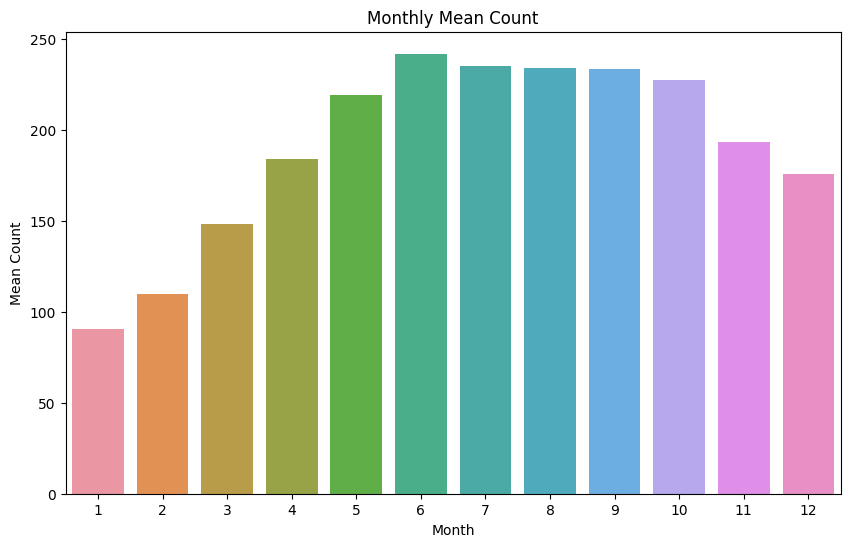

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='month', y='count', errorbar=None)
plt.title('Monthly Mean Count')
plt.xlabel('Month')
plt.ylabel('Mean Count')
plt.show()

막대그래프를 보면, 날씨가 따뜻한 6~8월에 자전거 평균 대여량이 가장 높은 반면, 비교적 추운 1월~3월에는 평균 대여량이 상대적으로 적었다는 것을 알 수 있습니다.

## 시간대별 자전거 대여량 시각화

시간에 따라서도 자전거 대여량의 변화가 생길 수 있는데요. 이번에는 hour 변수를 이용해서 시간대별 대여량을 막대그래프로 그려 보겠습니다.

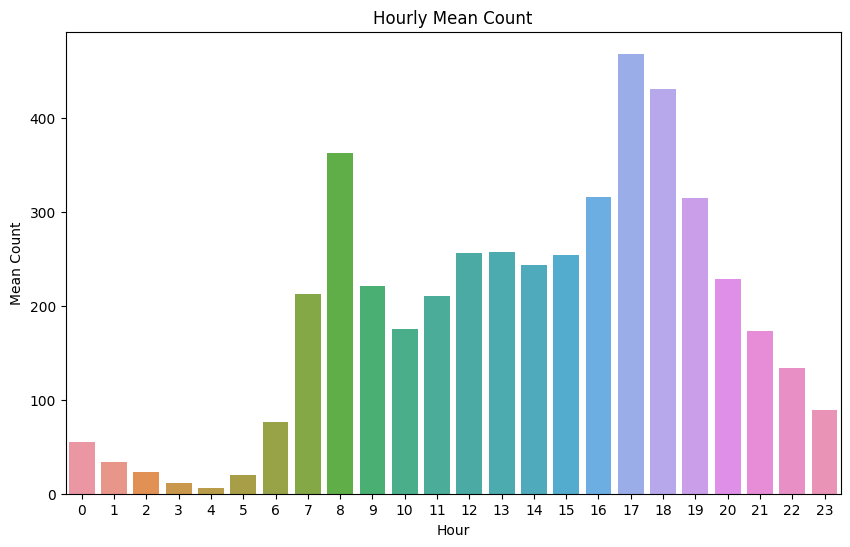

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='hour', y='count', errorbar=None)
plt.title('Hourly Mean Count')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.show()

가장 눈에 띄는 것은, 출퇴근 시간대인 7시와 17~18시에 대여량이 급격히 증가한다는 것입니다. 반면 새벽 시간대에는 자전거 대여량이 상당히 적은 것을 볼 수 있습니다.

## 일별 자전거 대여량 시각화

그렇다면 일별 자전거 대여량 변화는 어떨까요? 이번에는 day 변수를 기준으로 막대그래프를 그려 보겠습니다.

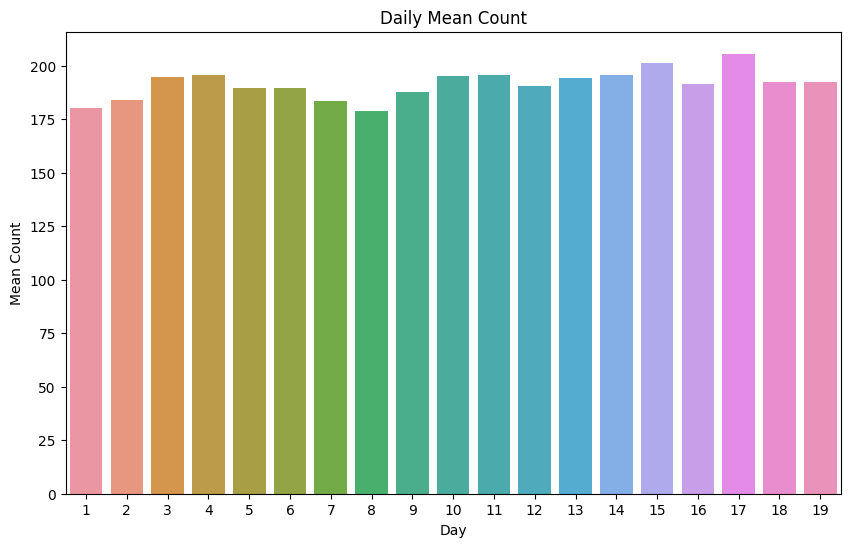

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='day', y='count', errorbar=None)
plt.title('Daily Mean Count')
plt.xlabel('Day')
plt.ylabel('Mean Count')
plt.show()

훈련 데이터는 1일부터 19일까지의 데이터만 제공되기 때문에 여기서도 19일까지의 값들만 보이네요. 다른 변수에 비해, 날짜와 대여량 사이에는 유의미한 차이는 없는 것으로 보이네요.

## 연도별 자전거 대여량 시각화
마지막으로 year 변수에 대해서도 같은 시각화 작업을 진행해 볼게요. 2011년과 2012년 평균 대여량에 어떤 차이가 있는지 확인해 봅시다.

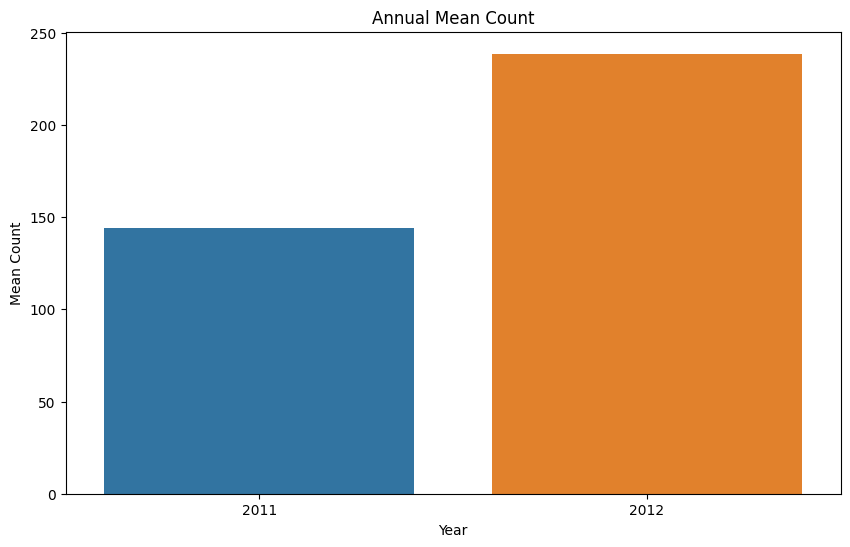

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='year', y='count', errorbar = None)
plt.title('Annual Mean Count')
plt.xlabel('Year')
plt.ylabel('Mean Count')
plt.show()

2011년에 비해 2012년에 대여량이 크게 증가했네요! 따라서 year 변수 또한 나중에 자전거 대여량을 예측하는 데에 큰 도움이 될 것으로 보입니다. 그런데 막대가 딱 두 개밖에 없어서 좀 허전한 느낌이 있는데요.

좀 더 자세한 분석이 가능하도록 이번에는 hour 변수를 추가해 보겠습니다. 라인 차트를 통해 연도별로 자전거 대여량이 시간대에 따라 어떻게 달라지는지 확인해 볼 거예요. 이를 위해 seaborn의 lineplot()을 사용하겠습니다. lineplot()도 barplot()처럼, 기본적으로 각 데이터 그룹의 평균값을 보여 주는데요. 참고로 여기서 hue는 year, x는 hour, y는 count로 설정했습니다.

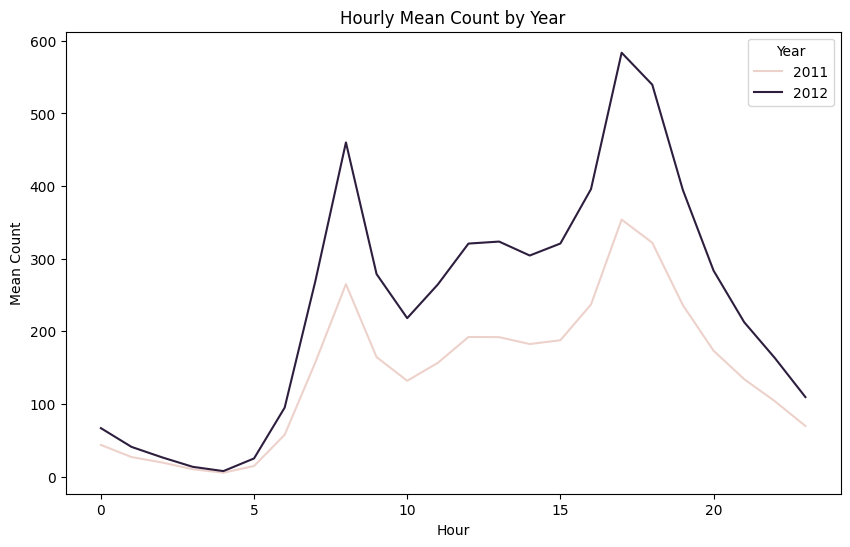

In [77]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='year', errorbar=None)
plt.title('Hourly Mean Count by Year')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Year')
plt.show()

위에서 막대그래프를 통해 2012년의 대여량이 2011년에 비해 증가했던 것을 확인했었는데요. 이 라인 차트 덕분에 어느 시간대에 대여량이 더 많이 증가했는지 확인이 가능합니다. 새벽 시간대의 대여량은 거의 비슷하지만, 약 오전 7시부터 그 차이가 조금씩 드러나기 시작하네요. 특히 출퇴근 시간에 자전거 대여량이 크게 증가한 것으로 보아, 직장인들 사이에서 자전거에 대한 홍보가 잘 된 것으로 예측해 볼 수 있습니다.

## 계절별 자전거 대여량 시각화
그렇다면 계절에 따라서는 자전거 대여량이 어떻게 달라지는지도 궁금한데요. 그래서 이번에는 계절을 나타내는 season 변수를 분석해 보겠습니다. 위에서 작성한 코드를 그대로 가져와서 hue 값을 season으로 설정해 줄게요.

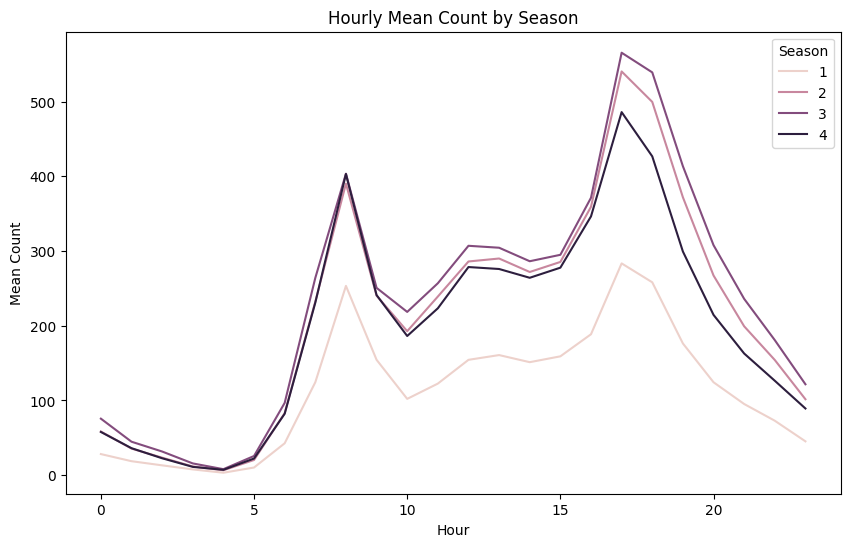

In [78]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='season', errorbar=None)
plt.title('Hourly Mean Count by Season')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Season')
plt.show()

season 변수는 1부터 4까지, 4개의 값으로 이루어져 있기 때문에 4개의 라인 차트를 확인할 수 있습니다. 전체적인 그래프의 모양은 모두 비슷하게 생겼는데요. 출퇴근 시간대에 대여량이 집중되어 있습니다. 그런데 season이 1인 그래프는 다른 계절과 비교했을 때, 출퇴근 시간대에도 대여량의 증가폭이 작은 편이기는 하네요.

## 날씨별 자전거 대여량 시각화
이번에는 날씨를 나타내는 weather 변수에 대해 분석해 봅시다. 이번에도 마찬가지로, 바로 앞에서 사용한 코드를 활용할 거고, hue 값을 weather로 바꿔 줄게요.

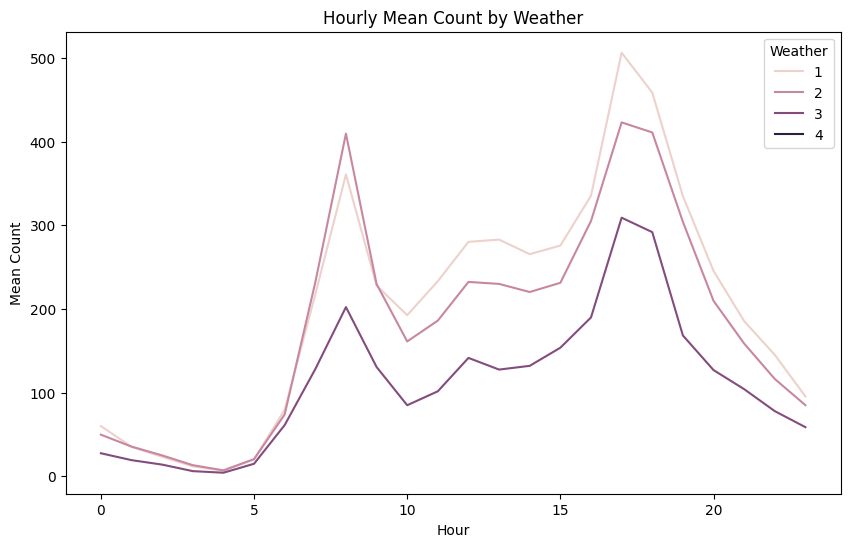

In [79]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='weather', errorbar=None)
plt.title('Hourly Mean Count by Weather')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Weather')
plt.show()

그래프의 범례(legend)를 보면 그래프가 4개가 보여야 될 것 같은데, 3개 밖에 없는데요. 자세히 보니 weather 값이 4에 해당하는 검은색 그래프가 안 보입니다. 이유가 뭘까요? weather 각각의 값이 몇 개씩 있는지 value_counts()를 통해 확인해 보겠습니다.

In [80]:
train_df['weather'].value_counts()


1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

weather가 4인 데이터는 딱 하나밖에 없다는 것을 알 수 있네요. 데이터가 여러 개 있어야 그래프를 제대로 그릴 수 있을 텐데, 데이터가 하나밖에 없으니 그러지 못한 것으로 보입니다. 아마 대부분의 날씨는 1~3으로 분류되었고, 정말 예외적인 경우의 날씨만 4라는 값을 사용해서 표현했다고 이해하고 넘어가겠습니다.

## temp와 atemp 살펴보기

기온 또한 자전거 대여량과 밀접한 관련이 있을 것 같은데요. 기온에 따라 자전거 대여량이 어떻게 변하는지도 한번 확인해 봅시다. 일단 지금 훈련 데이터에 temp가 어떤 값들로 이루어져 있는지 unique() 함수를 통해 확인해 볼게요.

In [81]:
train_df['temp'].unique() 

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

원래 온도는 연속형 변수이기는 하지만, 지금 값이 정수 형태로 기록되어 있어서 그런지 생각보다 값의 종류가 엄청 많지는 않네요. temp 변수는 사실 연속형 변수처럼 취급하는 게 더 자연스럽기는 하지만, 일단 대략적인 경향을 간단히 파악해 볼 수 있도록 x축에 temp, y축에 count를 놓고 라인 차트를 그려 보겠습니다.

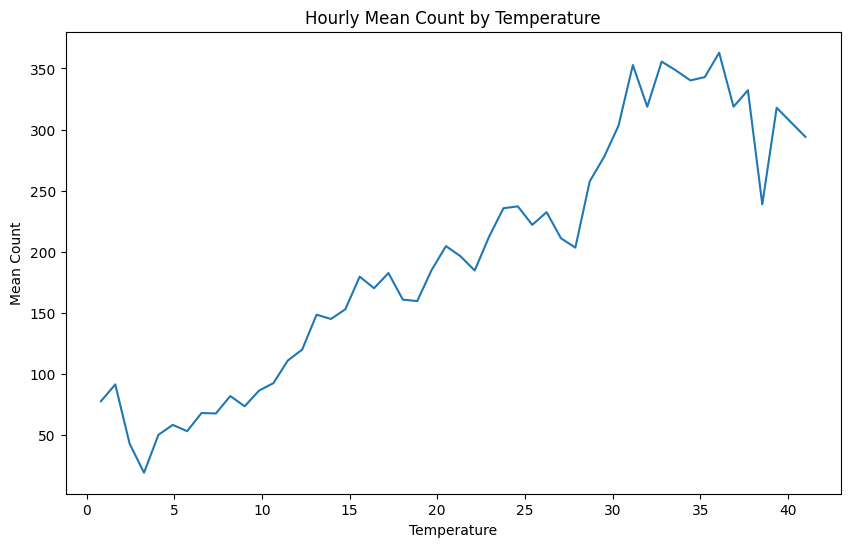

In [82]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='temp', y='count', errorbar=None)
plt.title('Hourly Mean Count by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Mean Count')
plt.show()

전체적으로 온도가 증가할수록 자전거 대여량도 같이 증가하는 경향이 보이네요. 이어서 체감 온도에 따른 대여량도 확인해 봅시다.

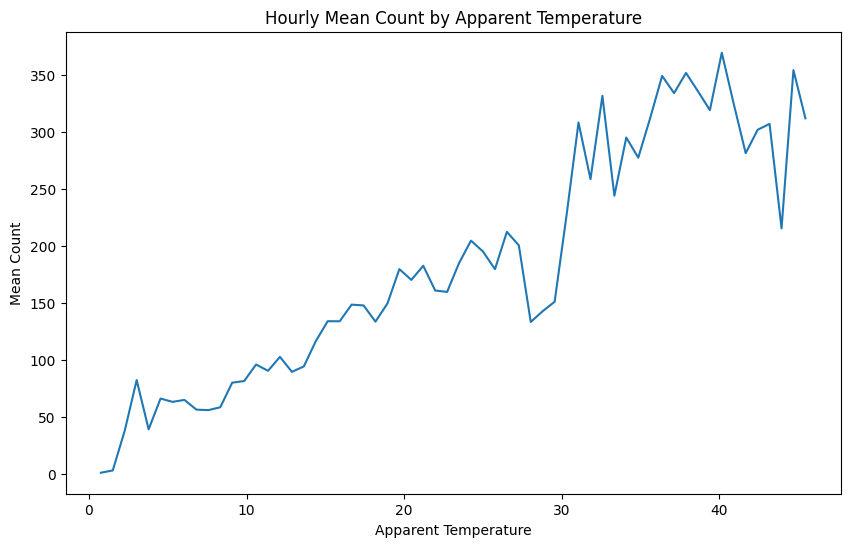

In [83]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='atemp', y='count', errorbar=None)
plt.title('Hourly Mean Count by Apparent Temperature')
plt.xlabel('Apparent Temperature')
plt.ylabel('Mean Count')
plt.show()

# 4. 모델 개선하기

## day_of_week 변수 추가하기
이제부터는 본격적인 피쳐 엔지니어링 작업을 진행해 보겠습니다. 지금까지 EDA를 진행하면서 '데이터 셋에 이런 변수도 있으면 좋을 텐데…' 이렇게 생각해 본 적 있으신가요?

현재 데이터에는 각 날짜가 무슨 요일인지 직접적으로 알 수 있는 변수가 없는데요. 요일 정보를 담고 있는 컬럼을 추가하면, 데이터 분석과 모델의 학습에 도움이 될 것으로 보입니다. 이를 위해 day_of_week라는 변수를 추가하여, 무슨 요일인지 숫자로 나타내 볼게요. 월요일부터 일요일까지를 각각 0~6의 숫자에 대응시켜 day_of_week 에 저장해 주겠습니다.

In [84]:
train_df['day_of_week'] = train_df['datetime'].dt.dayofweek
test_df['day_of_week'] = test_df['datetime'].dt.dayofweek

먼저, 각 요일별 count의 평균값을 막대그래프로 그려 보겠습니다.

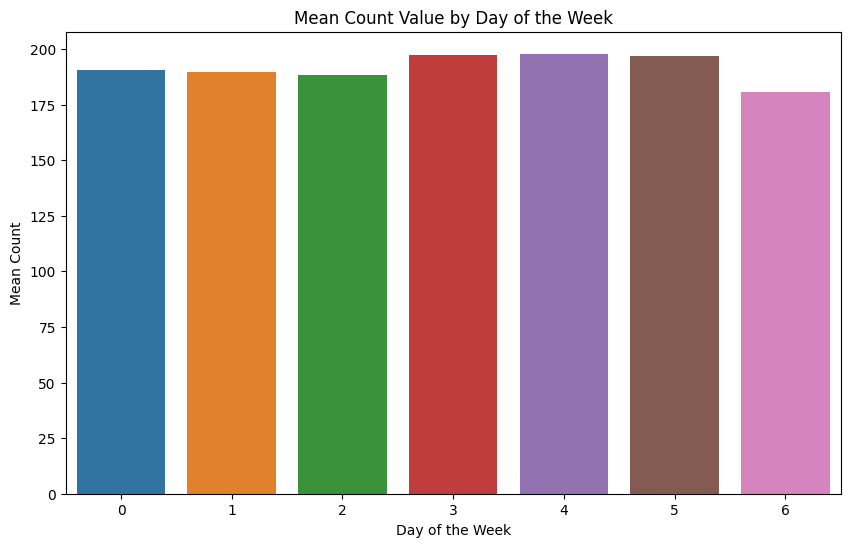

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='day_of_week', y='count', errorbar=None)
plt.title('Mean Count Value by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Count')
plt.show()

일주일 내내 약 175~200 사이의 값을 보이는군요. 이렇게 보면 요일별로 확연한 차이점을 발견하기 힘들기 때문에, 각 요일별 시간에 따른 count의 평균값을 그래프로 그려 보겠습니다. 요일별 그래프니까 그래프가 총 7개가 나오겠죠? 각 그래프를 명확하게 구분할 수 있도록 palette는 coolwarm이라는 것으로 설정해 줄게요.

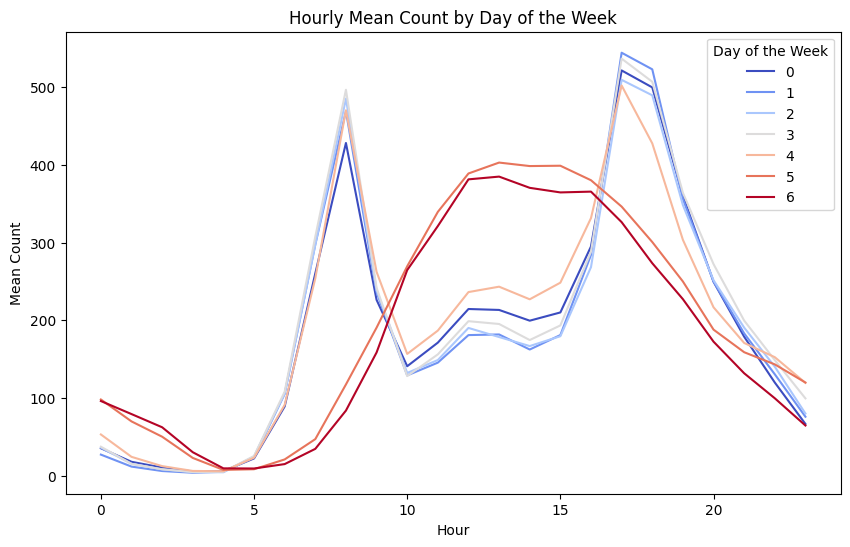

In [86]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='day_of_week', errorbar=None, palette='coolwarm')
plt.title('Hourly Mean Count by Day of the Week')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Day of the Week')
plt.show()

위의 그래프들을 크게 두 가지 유형으로 나눌 수 있겠는데요. 자세히 보면, day_of_week가 0~4(월요일~금요일)인 그래프와 day_of_week가 5~6(토요일~일요일)인 그래프가 비슷한 모양을 가지고 있습니다.

먼저 월요일부터 금요일에 해당하는 그래프는 아침 6시부터 급격히 증가하기 시작하여 대략 9시쯤 가장 높은 대여량을 보이네요. 이후로는 감소하다가, 15시부터 서서히 다시 증가하여 17시~18시쯤 가장 높은 값을 보입니다. 반면에 토요일부터 일요일에 해당하는 그래프는 그래프는 10시~15시에 가장 높은 대여량을 보입니다. 그렇다면 이런 차이점이 나타나는 원인은 무엇일까요?

여러 가지 이유가 있겠지만, 아마도 평일과 주말에 회사원의 출퇴근 여부가 자전거 대여량에 큰 영향을 미치는 것으로 추측해 볼 수 있습니다. 월요일에서 금요일까지 아침 시간대와 저녁 시간대에 가장 높은 대여량을 보이는 것은 이 시간이 출퇴근 시간에 해당하기 때문이고요. 반대로 주말에는 출퇴근 시간대보다는 많은 사람들이 야외 활동을 하는 10시~15시에 자전거 대여량이 가장 높은 것이죠.

또한 좀 더 자세히 들여다 보면 day_of_week 값이 4에 해당하는 금요일의 그래프는 조금 다른 형태를 보이는데요. 월요일부터 목요일까지의 그래프와 비교해 보면 전체적인 모양은 거의 비슷하지만, 금요일에는 10시~15시 구간에 대여량이 조금 더 많고 약 19시 이후부터는 대여량이 다른 날보다 조금 낮습니다. 여러 가지 이유가 있겠지만, 금요일은 다른 평일과는 다르게 다음날이 주말이라는 차이점이 있어요. 조금 더 일찍 주말을 즐기려고 금요일은 평소보다 일찍 자전거로 퇴근하는 회사원이 증가한다고 추측해 볼 수도 있겠네요.

## ```count``` 변수 로그 변환하기

지금까지 새로운 변수인 day_of_week를 추가해 봤고요. 이번에는 로그 변환이라는 걸 해 볼 겁니다. 로그 변환은 어떤 변수에 로그를 취하는 작업을 의미해요. 이번 프로젝트의 count 변수처럼 오른쪽으로 치우쳐진 불균형한 데이터가 있을 때, 로그 변환을 통해 좀 더 정규 분포와 비슷한 형태로 만들어 주는 효과가 있죠. (참고로 여기서 언급한 로그의 밑은 자연 로그(e)라고 보시면 됩니다.)

일단 복습 차원에서 count 값을 가지고 히스토그램을 다시 한번 그려 볼게요. 이번에는 bins=50으로 설정해 줬고, 기본적으로 0~100 구간에 값이 몰려 있다는 것을 확인할 수 있습니다.

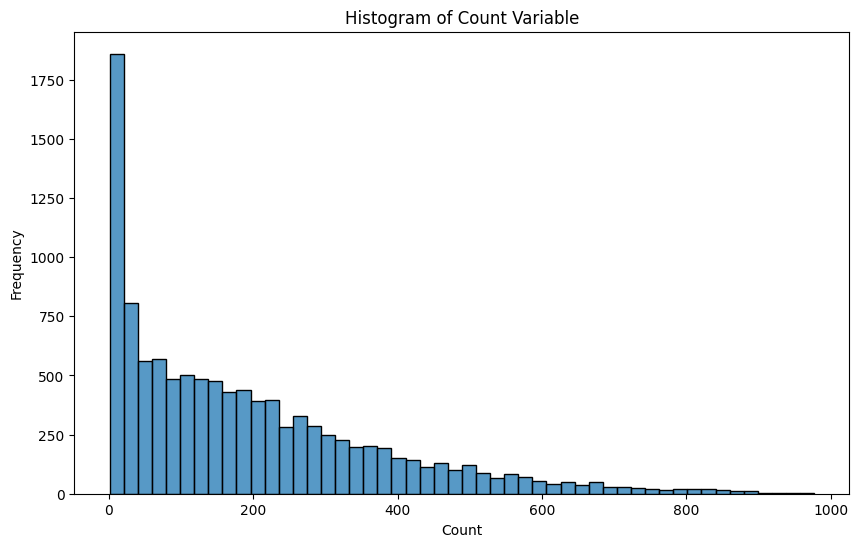

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['count'], bins=50)
plt.title('Histogram of Count Variable')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

이번에는 numpy의 log() 함수를 적용한 다음에 히스토그램을 그려 보겠습니다. 바로 위에 있는 그래프와 다르게, 값이 좀 더 골고루 분포하는 형태로 바뀌었네요. 이렇게 데이터를 변환해 두면, 모델의 성능을 높이는 데 도움이 되는 경우가 많습니다.

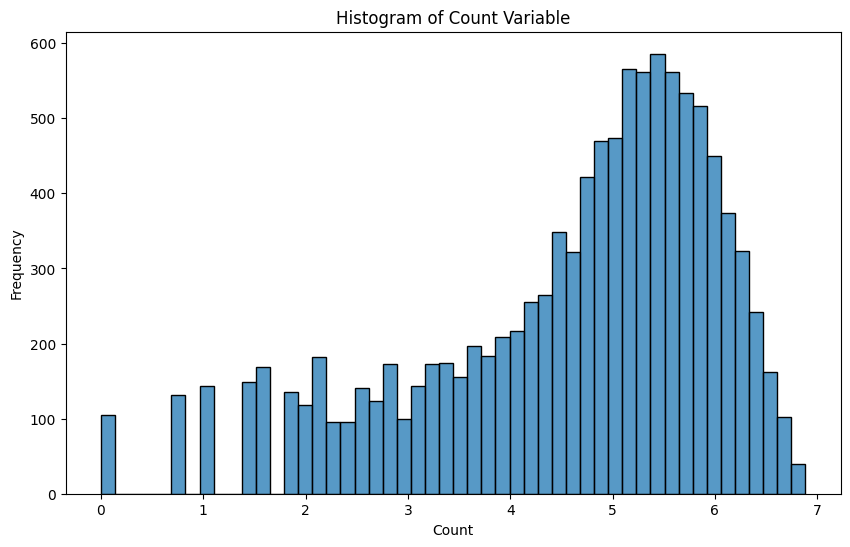

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(train_df['count']), bins=50)
plt.title('Histogram of Count Variable')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

## 모델 학습 및 답안 제출

이렇게 목표 변수(count)에 로그 변환을 적용한 후 모델을 활용할 때 주의해야 할 점이 있는데요. 로그 변환이 된 값을 기준으로 모델의 학습이 이루어지면, 그 모델을 가지고 예측한 값 또한 로그 변환이 된 상태라고 볼 수 있습니다. 그런데 우리에게 필요한 건 로그 변환을 하기 전 상태의, 원래 그대로의 값이겠죠?

따라서 예측값을 또다시 변환해 주는 과정이 필요합니다. 이럴 때에는 '지수 변환'이라는 걸 하면 되는데요. 아래 코드와 같이 numpy의 expm1()이라는 함수 안에 y_valid_pred 변수를 넣어 줬습니다.

In [89]:
# 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

# RMSLE 계산
rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'\nValidation Data RMSLE: {rmsle:.5f}')

# 테스트 데이터에 대한 예측
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))


Validation Data RMSLE: 1.02566


이제 아래 코드를 통해 submission_.csv라는 파일을 만들고, Kaggle 사이트에 답안을 제출해 볼게요.

In [91]:
submission_df['count'] = y_test_pred
submission_df.to_csv('submission_1.csv', index=False)

결과를 확인해 보면, 점수가 1.34066에서 1.05412으로 많이 향상된 것을 확인할 수 있습니다(비공식 순위: 2,793위) 이번 레슨에서 진행한 두 가지 작업이 효과가 있었네요. 이어서 만들 모델에도 그대로 적용해 봅시다.

# 5. 모델 개선하기 - Random Forest 모델 사용하기

지금까지는 sklearn 라이브러리의 LinearRegression 모델을 사용해 왔는데요. 다른 종류의 모델도 한번 사용해 봅시다. 이번 레슨에서는 결정 트리 기반의 모델인 RandomForestRegressor를 사용해 볼게요. 코드 실행을 반복해도 매번 같은 값이 나오도록, random_state 파라미터 값을 설정하겠습니다. 편의상 42로 통일해 줄게요.

In [92]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

모델을 만들었으니, 이제 이 모델을 학습시키고 테스트 데이터에 대한 예측값을 계산해 보겠습니다. LinearRegression 모델을 사용할 때 작성한 코드를 그대로 가져와서, 모델만 RandomForestRegressor로 바꿔 주면 되고요. 그리고 모델의 성능을 확인하기 위해, 검증 셋을 이용해서 RMSLE 값을 확인해 보겠습니다.

In [93]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')

Validation Data RMSLE: 0.30474


검증 RMSLE 값까지 확인해 봤으니, 이제 답안을 Kaggle 사이트에 제출해서 public RMSLE 값을 확인해 볼게요. 이전 레슨에서 답안 파일을 만들 때 썼던 코드를 활용합시다. 이번에는 submission_2-1.csv라는 파일로 저장해 둘게요.

In [94]:
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))

submission_df['count'] = y_test_pred
submission_df.to_csv('submission_2-1.csv', index=False)

바로 이전 레슨에서 학습시킨 LinearRegression 모델의 RMSLE 값이 1.05375였는데요. 모델만 Random Forest로 바꿔 줬더니 RMSLE값이 0.43865로 크게 향상되었습니다!(비공식 순위: 740위) 앞으로는 계속해서 Random Forest 모델을 사용해 볼게요.

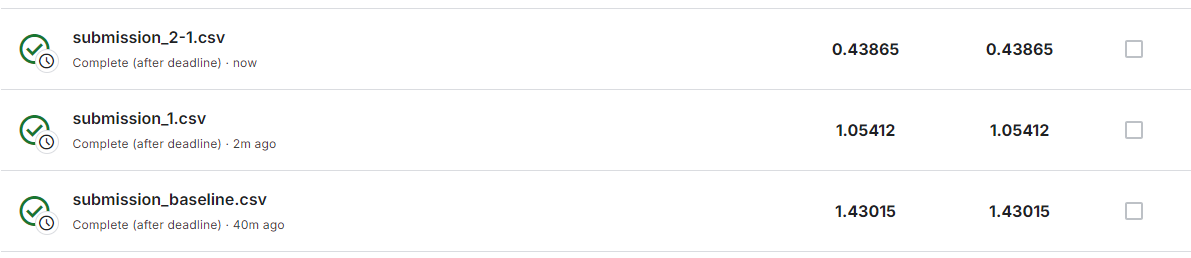

### humidity 변수 전처리
지난 레슨에서 count와 상관 계수가 높은 몇 가지 변수들에 대해 분석해 봤는데요. 이제부터는 습도를 의미하는 humidity 변수에 대해 자세히 살펴봅시다. 습도(humidity)는 우리의 일상 생활, 특히 야외 활동에 상당한 영향을 미칩니다. 지금부터는 습도와 자전거 대여량 간의 관계를 한번 살펴볼게요. 먼저 습도 값의 분포를 나타내는 히스토그램을 그려 보겠습니다.

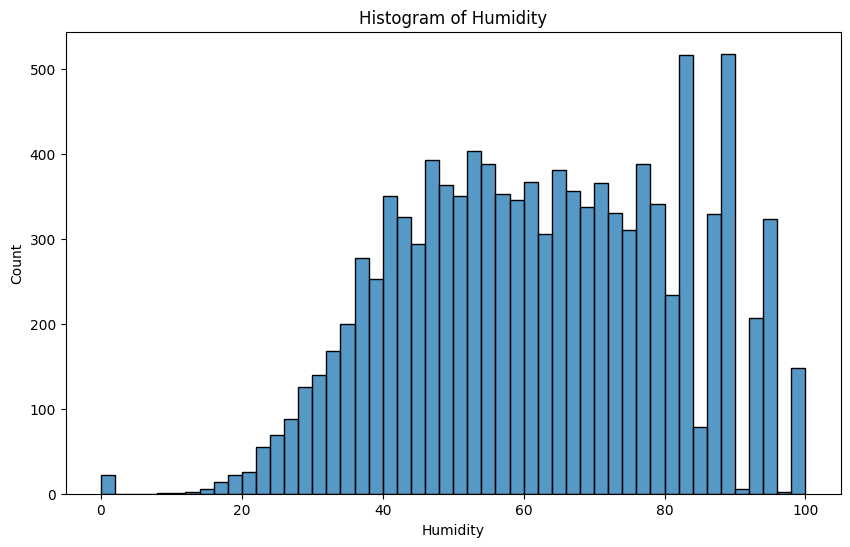

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['humidity'], bins=50)
plt.title('Histogram of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()

일반적으로 습도는 40에서 80 사이의 값을 가지고 있네요. 80 이후부터는 막대 크기가 들쑥날쑥한 부분도 있네요. 그리고 습도가 20 미만인 구간을 보면 0 근처의 막대 하나가 툭 튀어 나와있는 부분이 있는데요. 그렇다면 습도의 최솟값이 얼마인지 한번 확인해 봅시다.

In [96]:
train_df['humidity'].min()

0

humidity의 최솟값은 0이군요. 그런데 과학적으로 일반적인 도시의 습도가 0일 가능성은 매우 낮다고 하네요. 데이터에 뭔가 문제가 있는 것 같으니, humidity가 0인 행을 찾아서 모두 출력해 보겠습니다.

In [97]:
train_df[train_df['humidity'] == 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_of_week
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3,2011,3,10,0,3
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2,2011,3,10,1,3
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1,2011,3,10,2,3
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3,2011,3,10,5,3
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12,2011,3,10,6,3
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1,36,37,2011,3,10,7,3
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44,2011,3,10,8,3
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1,23,24,2011,3,10,9,3
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17,2011,3,10,10,3
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6,5,11,2011,3,10,11,3


출력 결과가 좀 길지만, 잘 보면, 2011년 3월 10일 0시부터 23시까지 하루 종일 습도가 0이었다는 것을 알 수 있어요. 아마도 이 날은 습도 측정이 제대로 되지 않은 것으로 보이네요. 다른 값으로 대체하는 게 좋아 보입니다. 여러 가지 방법이 있겠지만, 이 레슨에서는 간단하게 평균 습도 값으로 대체해 주겠습니다.

In [98]:
avg_humidity = train_df.humidity.mean()
train_df.loc[train_df['humidity'] == 0, 'humidity'] = avg_humidity

### 습도에 따른 자전거 대여량 시각화

결측값 처리를 마쳤으니, 이제는 습도에 따라 자전거 대여량이 어떻게 변하는지 한번 확인해 봅시다. 앞의 레슨에서 온도에 따른 자전거 대여량을 시각화했던 것처럼, 라인 차트를 통해 대략적인 경향을 간단히 파악해 볼 거예요. seaborn의 lineplot() 함수를 사용해서 x는 humidity, y는 count로 설정하면 되겠죠?

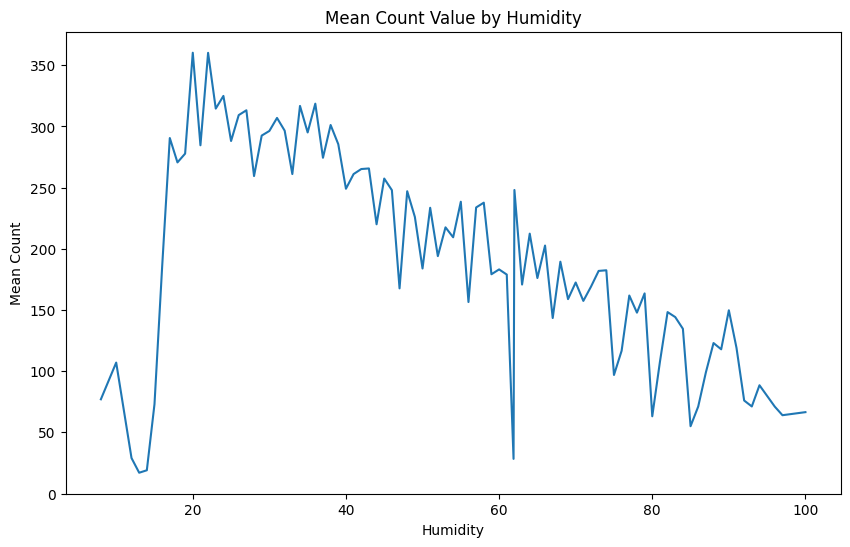

In [99]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='humidity', y='count', errorbar=None)
plt.title('Mean Count Value by Humidity')
plt.xlabel('Humidity')
plt.ylabel('Mean Count')
plt.show()

전체적으로 봤을 때, 습도가 증가할수록 자전거 대여량의 평균값이 서서히 감소하는 경향을 보입니다. 그리고 대략 20도 초반의 적당한 습도일 때 가장 자전거 대여량이 많았다는 것도 알 수 있죠.

### 모델 학습 및 답안 제출
이번 레슨에서는 머신 러닝 모델을 RandomForestRegressor로 바꾸고, humidity 변수에 있는 결측값들을 처리해 봤는데요. 두 가지 변경 사항을 모두 반영해서 모델을 학습시킨 뒤, 검증 RMSLE 값을 확인하면 0.30427이라는 값이 나옵니다.

In [102]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')

Validation Data RMSLE: 0.30472


In [103]:
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))

submission_df['count'] = y_test_pred
submission_df.to_csv('submission_2-2.csv', index=False)

# 6. 모델 개선하기 - 다른 변수들과 대여량 관계 살펴보기 
## holiday 변수 살펴보기
먼저 해당 날짜가 공휴일인지 여부를 나타내는 변수인 holiday에 대해 살펴볼게요. 일단 value_counts()를 통해 holiday 값의 분포를 확인해 보겠습니다.

In [104]:
train_df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

holiday는 1의 비중이 3%로 매우 적네요. 참고로 여기서 holiday가 1이라는 것은 일반적인 주말은 제외하고 크리스마스 등의 공휴일에 해당한다는 것을 의미합니다. 그러면 holiday 값이 0인지 1인지에 따라 자전거 대여량은 어떻게 달라질까요? 지금부터는 공휴일과 비공휴일의 시간대별 자전거 대여량을 비교해 보겠습니다.

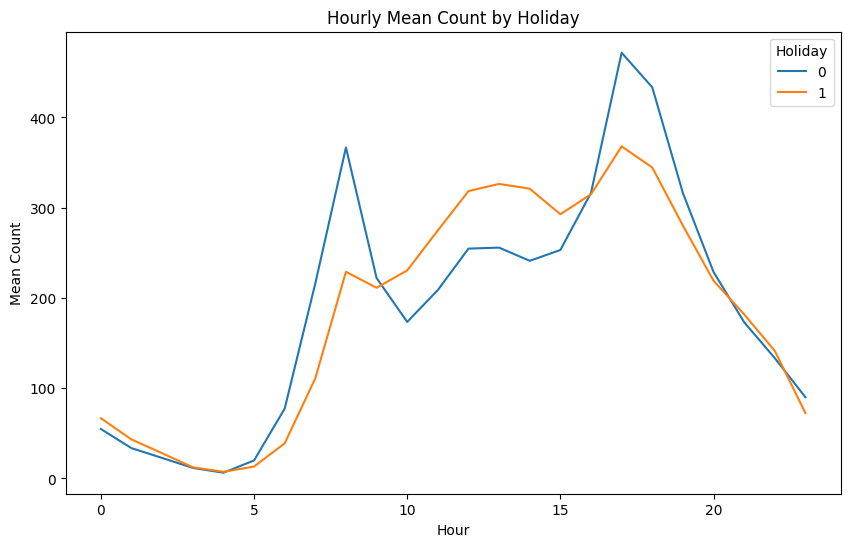

In [106]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='holiday', errorbar=None)
plt.title('Hourly Mean Count by Holiday')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Holiday')
plt.show()

공휴일에는 공휴일이 아닌 날에 비해 상대적으로 시간대별 증가/감소 폭이 적다는 것을 알 수 있네요.

## workingday 변수 살펴보기
이번에는 영업일 여부를 의미하는 workingday 변수를 기준으로 시각화를 해 볼게요. x축에는 hour, y축에는 평균 count 값을 표시해 주겠습니다.


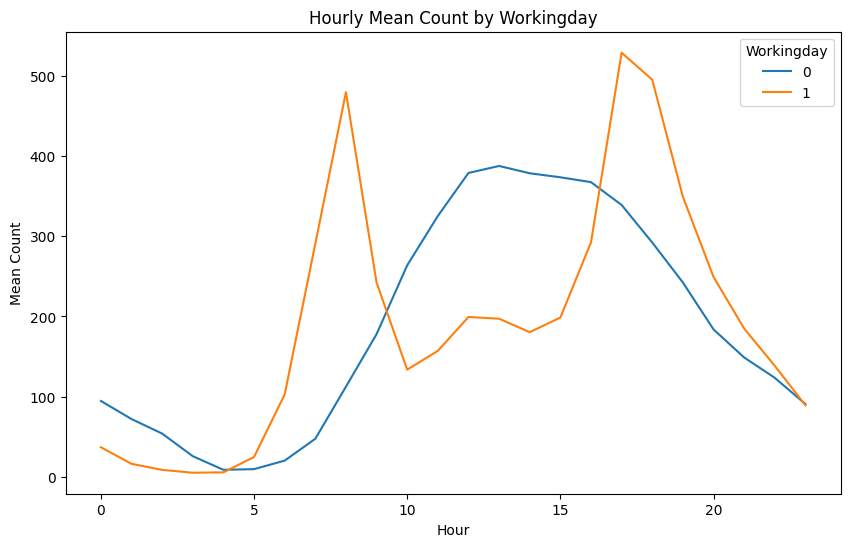

In [107]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='workingday', errorbar = None)
plt.title('Hourly Mean Count by Workingday')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Workingday')
plt.show()

영업일 여부를 기준으로 보면, 두 그래프의 차이점이 더욱 뚜렷하게 나타납니다. 그런데 그래프의 모양이 이전에 그렸던 그래프 중 하나랑 거의 비슷한 것 같은데요.

## day_of_week 변수 다시 살펴보기
이전에 요일별로 시간에 따라 자전거 대여량이 어떻게 달라지는지 시각화를 해 봤었는데요. 그때 그렸던 그래프를 다시 살펴보겠습니다.
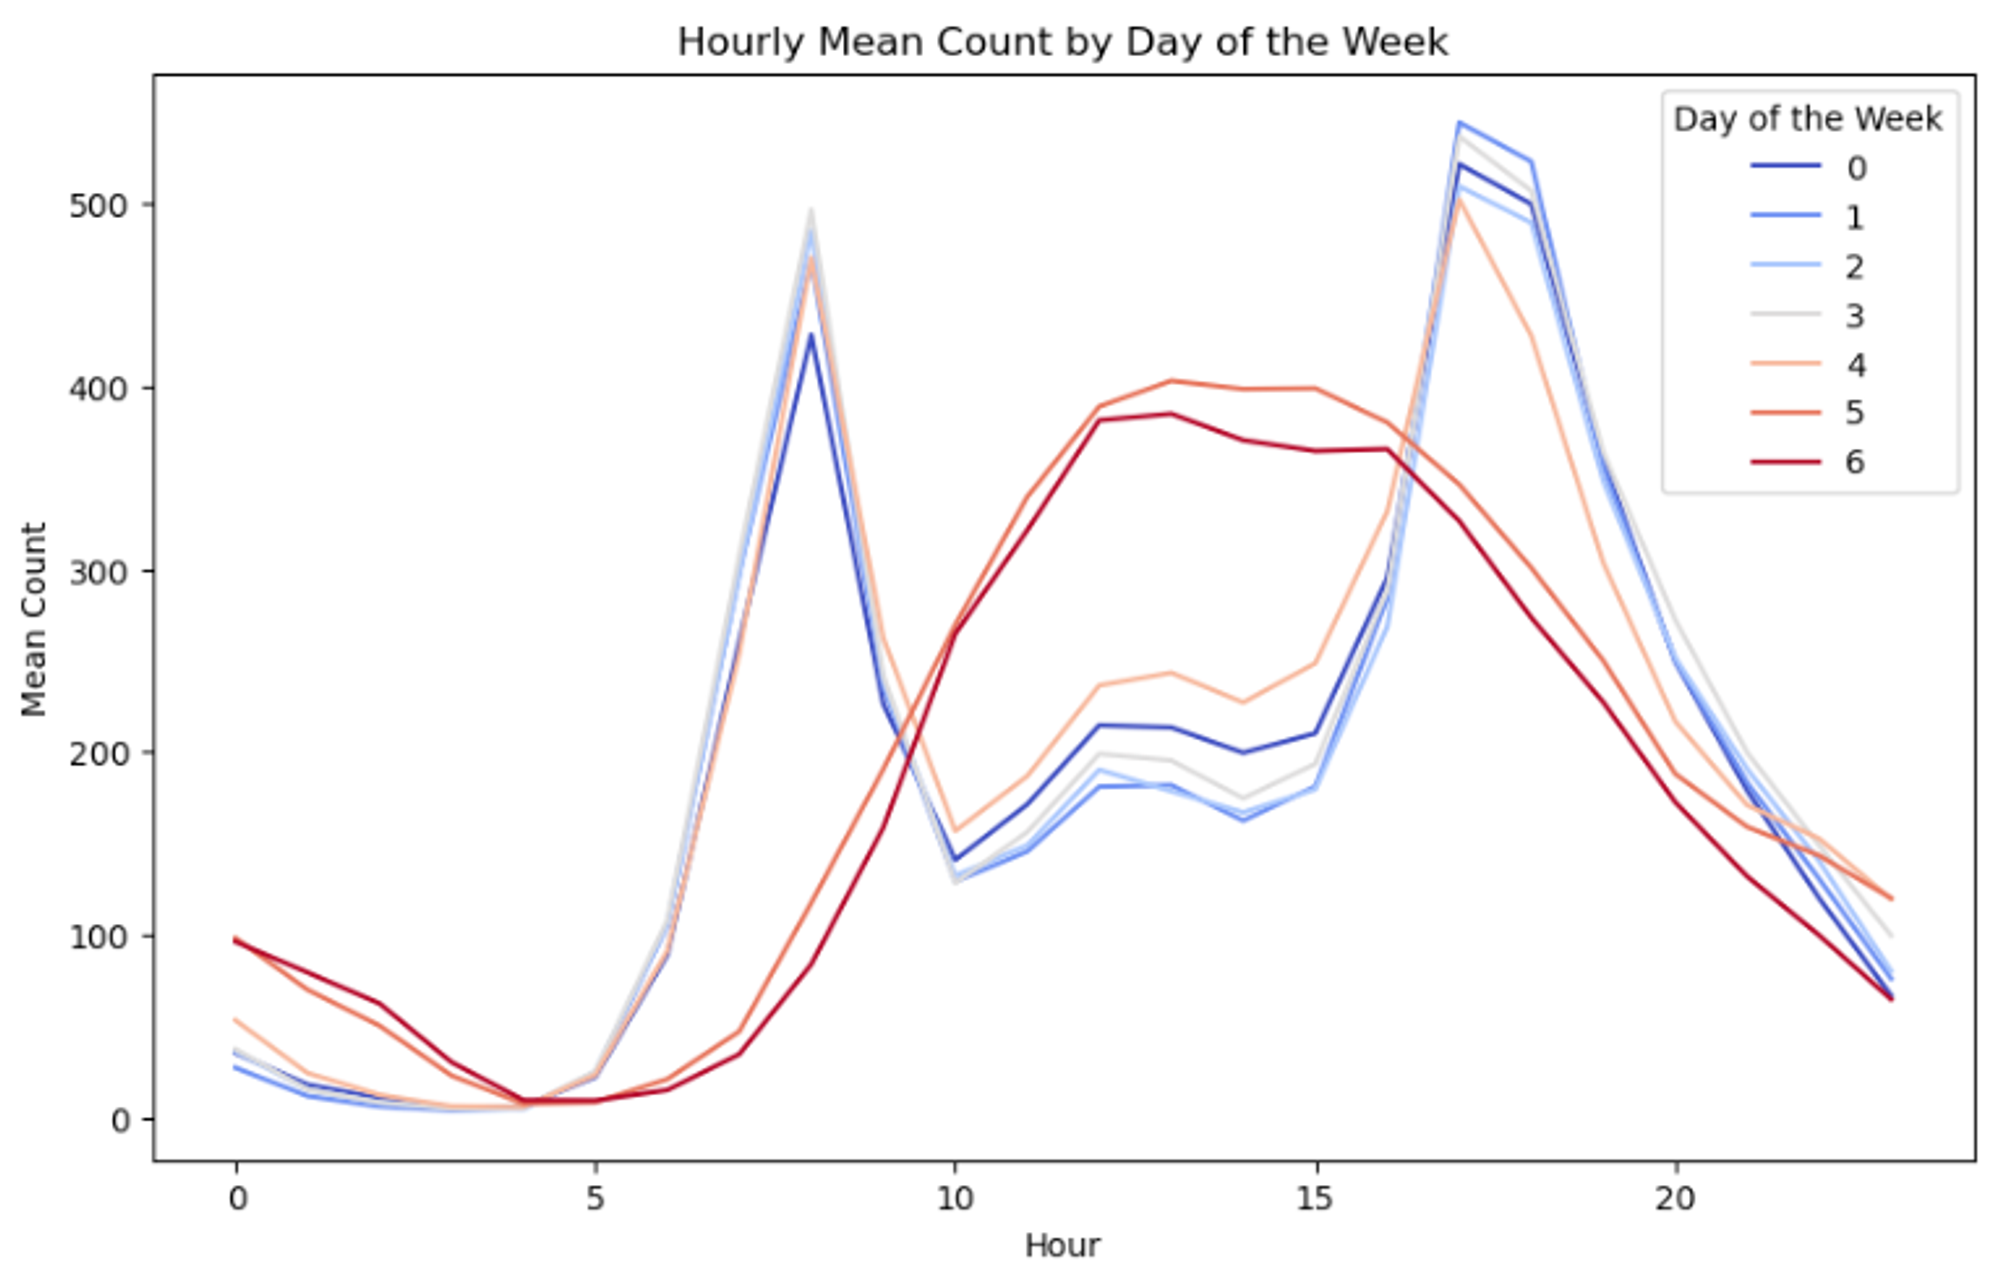
7개의 라인 차트를 두 가지 유형으로 나눠 봤었죠? 여기 보시면 day_of_week이 0~4(월요일~금요일)인 것과 day_of_week이 5~6(토요일~일요일)인 그래프가 서로 비슷하게 생겼습니다. 그리고 두 그래프의 모양이 위에서 그린 영업일 여부에 따른 그래프와 얼추 비슷한데요. 공휴일을 제외하면, 보통 월요일에서 금요일은 영업일이고 토요일과 일요일은 영업일이 아니기 때문입니다.

한 가지 더 짚고 넘어가자면, day_of_week이 0~4인 것 중에서도, 4에 해당하는 그래프는 약간의 차이가 있어요. 금요일은 주말과 붙어 있어서 자전거 대여 패턴이 다른 평일과는 조금 달라질 수 있기 때문이죠. 비슷하게 공휴일 전날에도 일반적인 평일이나 영업일과는 다른 양상을 보일 수도 있겠네요.

## daytype 변수 추가하기

이렇게 공휴일 여부, 영업일 여부, 요일 등에 따라 자전거 대여 패턴이 조금씩 달라진다는 것을 알 수 있습니다. 지금까지 확인한 내용을 바탕으로 daytype이라는 새로운 변수를 추가해 볼 건데요. 기존의 workingday 변수는 0, 1이라는 두 가지 값만 가지고 있었는데, 금요일은 따로 처리해서 세 가지 값으로 분류해 줄 겁니다. 물론 금요일 뿐만 아니라 공휴일 전날도 고려하는 등 좀 더 정교하게 daytype을 분류하는 방법도 있겠지만, 편의상 아래와 같은 간단한 코드로 진행해 볼게요.

일단 모든 행에 대해 0으로 채워 주고 특정 조건에서 1 혹은 2를 채워 주는 방식을 사용했는데요. 금요일, 즉 day_of_week 값이 4인 경우 1을 채워 넣었습니다. 그리고 workingday 값이 0인 경우(영업일이 아닌 경우)에는 2를 채워 넣었어요. 여기서 주의할 점은, 어떤 날은 금요일인 동시에 공휴일일 수도 있다는 거예요. 이럴 때에는 2라는 값이 들어가도록 코드 순서를 아래와 같이 작성해 주셔야 합니다.

In [108]:
train_df['daytype'] = 0
train_df.loc[train_df['day_of_week'] == 4, 'daytype'] = 1  # 금요일
train_df.loc[train_df['workingday'] == 0, 'daytype'] = 2 # 비영업일

test_df['daytype'] = 0
test_df.loc[test_df['day_of_week'] == 4, 'daytype'] = 1  # 금요일
test_df.loc[test_df['workingday'] == 0, 'daytype'] = 2 # 비영업일

이제 데이터 셋에 daytype 변수를 추가하는 작업을 마쳤습니다. daytype을 기준으로 시간대별 평균 자전거 대여량도 그래프로 그려 볼게요.

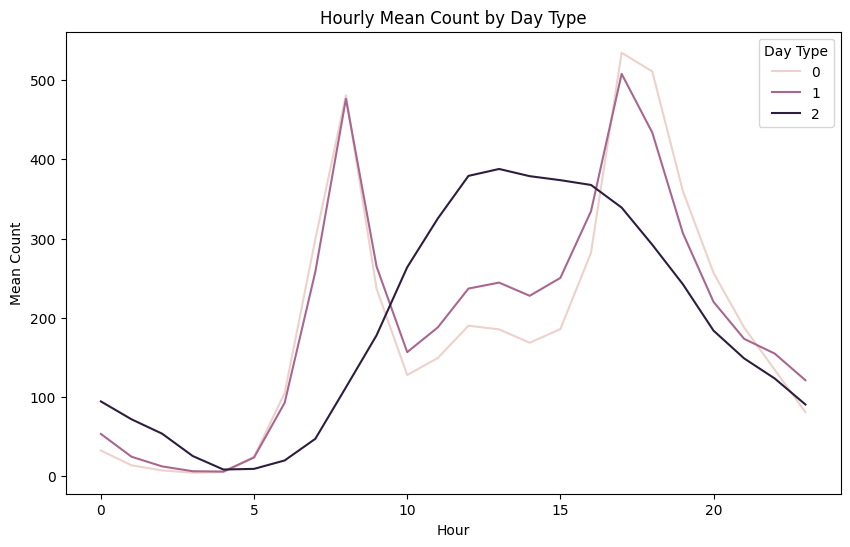

In [109]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='daytype', errorbar=None)
plt.title('Hourly Mean Count by Day Type')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Day Type')
plt.show()

daytype이 0인 그래프와 1인 그래프는 전체적으로 비슷한 형태를 보이고 있지만, 오전 10시부터는 조금씩 차이가 난다는 것을 알 수 있습니다. daytype이 2인 그래프는 확연하게 다른 형태를 보이고 있네요. 이와 같이 데이터의 명확한 특성을 반영할 수 있는 변수를 추가하면, 모델 성능 향상에 도움이 될 수 있습니다. 실제로 성능에 도움이 되는지는 조금 이따 확인해 볼게요.

## workingday 변수 제거하기
이번에 새로 만든 daytype 변수는 workingday 변수를 기반으로 만들어졌는데요. 따라서 daytype 변수에 영업일 관련 정보가 담겨 있으므로, workingday 변수는 데이터에서 제거해도 괜찮아 보입니다. daytype 변수를 만들 때 공휴일 관련 정보는 고려하지 않았으니까, holiday 변수는 그대로 두도록 할게요.

In [112]:
train_df = train_df.drop(columns='workingday')
test_df = test_df.drop(columns='workingday')

KeyError: "['workingday'] not found in axis"

## 모델 학습 및 답안 제출
이제 이번 레슨에서 변경된 사항들을 반영하여 모델 학습을 진행해 봅시다.

In [113]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')


Validation Data RMSLE: 0.30277


In [114]:
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))

submission_df['count'] = y_test_pred
submission_df.to_csv('submission_3.csv', index=False)

# 7.모델 개선하기 -  평균값 파생 피쳐(hour) 추가하기
모델 성능 개선을 위해 새로운 피쳐를 추가하는 작업을 계속 진행하고 있는데요. 이번에는 '평균값 파생 피쳐'라는 걸 추가하는 방법을 소개해 드리겠습니다. 바로 예시를 들어 볼게요. 시간대별 평균 대여량을 나타내는 mean_count_by_hour라는 변수를 만들어 볼 거고요. 일단 먼저, groupby()를 통해 hour를 기준으로 count의 평균값을 계산할 겁니다.

In [115]:
groupby_df = train_df.groupby('hour')['count'].mean().reset_index()
groupby_df.columns = ['hour', 'mean_count_by_hour']
groupby_df.head()

,hour,mean_count_by_hour
0,0,55.138462
1,1,33.859031
2,2,22.899554
3,3,11.757506
4,4,6.407240


시간대별 평균 대여량이 잘 계산되었네요. 이제 각 값을 시간대별 대표 값으로 사용할 건데요. 그러니까 데이터에 mean_count_by_hour라는 컬럼을 만들고, hour 값에 따라 값을 채워 넣을 겁니다. 그러니까, hour가 0이면 모두 55.138462, 1이면 33.859031, 22이면 22.899554… 이런 식으로 값이 들어가는 거죠.

이제 기존의 train_df에 mean_count_by_hour 컬럼을 추가해 볼게요. 아래와 같이 pandas의 merge()함수를 이용해서 hour를 기준으로 두 DataFrame을 하나로 합쳐 주겠습니다. test_df에도 마찬가지로 동일한 작업을 해 줄게요. 훈련 데이터의 시간별 평균 대여량 값을 테스트 데이터에도 똑같이 넣어 준 거예요.

In [116]:
train_df = train_df.merge(groupby_df, on='hour', how='left')
test_df = test_df.merge(groupby_df, on='hour', how='left')

## 평균값 파생 피쳐(daytype, hour) 추가하기
또다른 평균값 파생 피쳐도 추가해 보겠습니다. 위에서는 hour 변수를 한 가지를 기준으로 대표 값을 만들어 봤는데요. 2개, 혹은 3개 이상의 변수를 조합해서 그룹을 만드는 것도 가능합니다. 이번에는 daytype과 hour를 활용해서 평균값 파생 피쳐를 만들어 볼게요. 일단 두 가지 변수를 기준으로 groupby를 해서 평균값을 계산해 줍니다. 좀 더 그룹을 세분화해서 계산을 하게 되는거죠.

In [117]:
groupby_df = train_df.groupby(['daytype', 'hour'])['count'].mean().reset_index()
groupby_df.columns = ['daytype', 'hour', 'mc_daytype_hour']

그리고 위에서 했던 것과 비슷하게 merge() 함수를 이용해서 daytype, hour에 매핑되는 값이 들어가도록 해 줍니다.

In [118]:
train_df = train_df.merge(groupby_df, on=['daytype', 'hour'], how='left')
test_df = test_df.merge(groupby_df, on=['daytype', 'hour'], how='left')

DataFrame을 출력해 보면, 아래와 같이 mean_count_by_hour와 mc_daytype_hour 컬럼이 잘 추가되어 있는 것을 확인할 수 있어요.

In [120]:
train_df.head()

,datetime,season,holiday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_of_week,daytype,mean_count_by_hour,mc_daytype_hour
0,2011-01-01 00:00:00,1,0,1,9.84,14.395,81.0,0.0,3,13,16,2011,1,1,0,5,2,55.138462,94.489655
1,2011-01-01 01:00:00,1,0,1,9.02,13.635,80.0,0.0,8,32,40,2011,1,1,1,5,2,33.859031,71.910345
2,2011-01-01 02:00:00,1,0,1,9.02,13.635,80.0,0.0,5,27,32,2011,1,1,2,5,2,22.899554,53.748252
3,2011-01-01 03:00:00,1,0,1,9.84,14.395,75.0,0.0,3,10,13,2011,1,1,3,5,2,11.757506,25.534722
4,2011-01-01 04:00:00,1,0,1,9.84,14.395,75.0,0.0,0,1,1,2011,1,1,4,5,2,6.407240,8.544828


In [121]:
test_df.head()

,datetime,season,holiday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,day_of_week,daytype,mean_count_by_hour,mc_daytype_hour
0,2011-01-20 00:00:00,1,0,1,10.66,11.365,56,26.0027,2011,1,20,0,3,0,55.138462,32.552419
1,2011-01-20 01:00:00,1,0,1,10.66,13.635,56,0.0000,2011,1,20,1,3,0,33.859031,13.821862
2,2011-01-20 02:00:00,1,0,1,10.66,13.635,56,0.0000,2011,1,20,2,3,0,22.899554,7.407407
3,2011-01-20 03:00:00,1,0,1,10.66,12.880,56,11.0014,2011,1,20,3,3,0,11.757506,4.502183
4,2011-01-20 04:00:00,1,0,1,10.66,12.880,56,11.0014,2011,1,20,4,3,0,6.407240,5.225000


이제 아래 코드를 통해 모델을 학습시켜 봅시다.

In [122]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')


Validation Data RMSLE: 0.30296


검증 RMSLE 값이 이전 레슨의 결과보다 약간 높아지기는 했는데요. 일단 답안 파일을 만들어서 Kaggle에도 제출해 봅시다. 다행히 Kaggle에서 확인한 점수는 0.43071로 좀 더 개선되었습니다. 비공식 순위를 매겨 보면 574위고요.

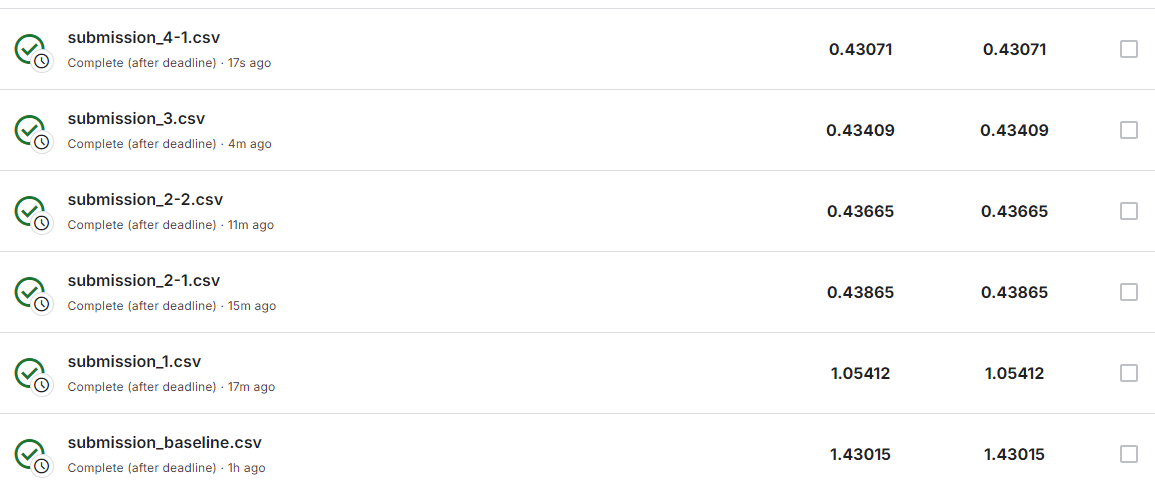

In [123]:
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))

submission_df['count'] = y_test_pred
submission_df.to_csv('submission_4-1.csv', index=False)

### 변수 선택
일부 변수를 제거했을 때 오히려 모델의 성능이 올라가는 경우도 있는데요. 분산의 크기, 다중 공선성, 피쳐 중요도 등 다양한 기준을 참고할 수도 있지만, 이번 레슨에서는 편의상 직관적으로 몇 가지 후보를 추려서 모델을 학습시키고 결과를 비교해 보는 방식으로 진행해 보겠습니다.

일단 day, month, atemp를 제거해 볼게요. 먼저 훈련 데이터는 1일부터 19일까지, 테스트 데이터는 20일부터 31일까지의 정보를 담고 있는데, 아무래도 두 데이터에 겹치는 날자가 없다 보니 학습에 크게 도움이 되지 않을 것 같아서 제거해 봤고요. month와 season, atemp와 temp는 각각 서로 상관관계가 높아서 둘 중에 하나만 남겨 줘도 괜찮을 것 같습니다.

In [124]:
drop_features = ['day', 'month', 'atemp']

train_df = train_df.drop(drop_features, axis=1)
test_df = test_df.drop(drop_features, axis=1)

모델 학습 및 답안 제출

In [125]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')

Validation Data RMSLE: 0.31260


이번에도 검증 RMSLE 값이 약간 높아지기는 했는데요. 답안 파일을 Kaggle에 제출해 보니, Private/Public Score 값은 0.39554, 비공식 순위는 190위로 개선되는 효과가 있었습니다.

In [126]:
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))

submission_df['count'] = y_test_pred
submission_df.to_csv('submission_4-2.csv', index=False)

# 8 모델 개선하기 - 하이퍼파라미터 튜닝

이번 레슨에서는 모델의 성능을 개선하기 위한 하이퍼파라미터 튜닝을 진행해 보겠습니다. 하이퍼파라미터는 모델의 학습 과정을 제어하고 모델의 복잡성을 조절하는 데 사용되는 변수라고 할 수 있어요. 지금까지는 Random Forest 모델을 쓸 때, random_state 외에는 하이퍼파라미터를 따로 설정하지 않고 그냥 모델의 기본값을 사용해 왔는데요.  지금부터는 그리드 서치(Grid Search)라는 방식을 사용해서 여러 가지 하이퍼파라미터 중에서 최적의 조합을 찾아보겠습니다. 하이퍼파라미터의 종류나 선택지가 늘어날 수록 탐색 시간이 급격히 늘어날 수 있어서, 간단하게 n_estimators, max_depth, min_samples_split이라는 세 가지 하이퍼파라미터에 대해서만 진행해 볼게요.

Random Forest는 결정 트리 기반의 모델인데요. 여기서 n_estimators는 학습시 생성할 트리의 개수, max_depth는 각 트리의 최대 깊이, min_samples_split은 노드가 분할되기 위해 가져야 하는 최소 샘플 수를 의미합니다. 깊이가 깊을수록 모델이 데이터를 더 잘 학습할 수 있지만, 과적합의 위험도 높아질 수 있어서 적절한 깊이를 설정해 주는 것이 필요합니다.

일단 사이킷런의 GridSearchCV를 불러온 뒤, param_grid라는 변수에 두 가지 하이퍼파라미터의 조합을 딕셔너리로 만들어서 담아 둘게요. 이때 각 하이퍼파라미터에 대한 후보 값들은 딕셔너리 안에 리스트 형태로 넣어 주면 됩니다. 아래와 같이 n_estimators 값의 후보로는 [50, 100, 200], max_depth는  [None, 10, 20], min_samples_split은 [4, 6, 8]로 해 두었습니다.


In [127]:
from sklearn.model_selection import GridSearchCV

X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼 파라미터 초기 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [4, 6, 8],
}

이어서 Random Forest 모델을 만들고, GridSearchCV에 fit() 함수를 사용해서 K-Fold 교차 검증을 통해 각 조합의 성능을 비교하여 학습을 진행할 수 있습니다. 이 코드를 실행할 때 시간이 조금 걸릴 수 있다는 점 참고해 주세요.

In [128]:
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, np.log1p(y_train))

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [50, 100, 200]})

그리고 best_params_ 값을 출력해 보면, 지금 max_depth는 None, min_samples_split은 4, n_estimators는 200일 때 가장 좋은 성능을 보였다는 것을 알 수 있습니다.

In [129]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 200}


마지막으로 아래와 같은 코드를 통해 best_model 변수에 최적의 조합으로 학습한 모델을 저장해 두겠습니다.

In [130]:
best_model = grid_search.best_estimator_

예측값 반환 및 답안 제출

In [131]:
y_valid_pred = best_model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

y_test_pred = best_model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))
rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')

Validation Data RMSLE: 0.30863


마찬가지로 답안 파일을 만들고 Kaggle에 제출하면, 이번에는 Public/Private Score는 0.39292, 비공식 순위는 179위라는 결과를 확인할 수 있습니다.
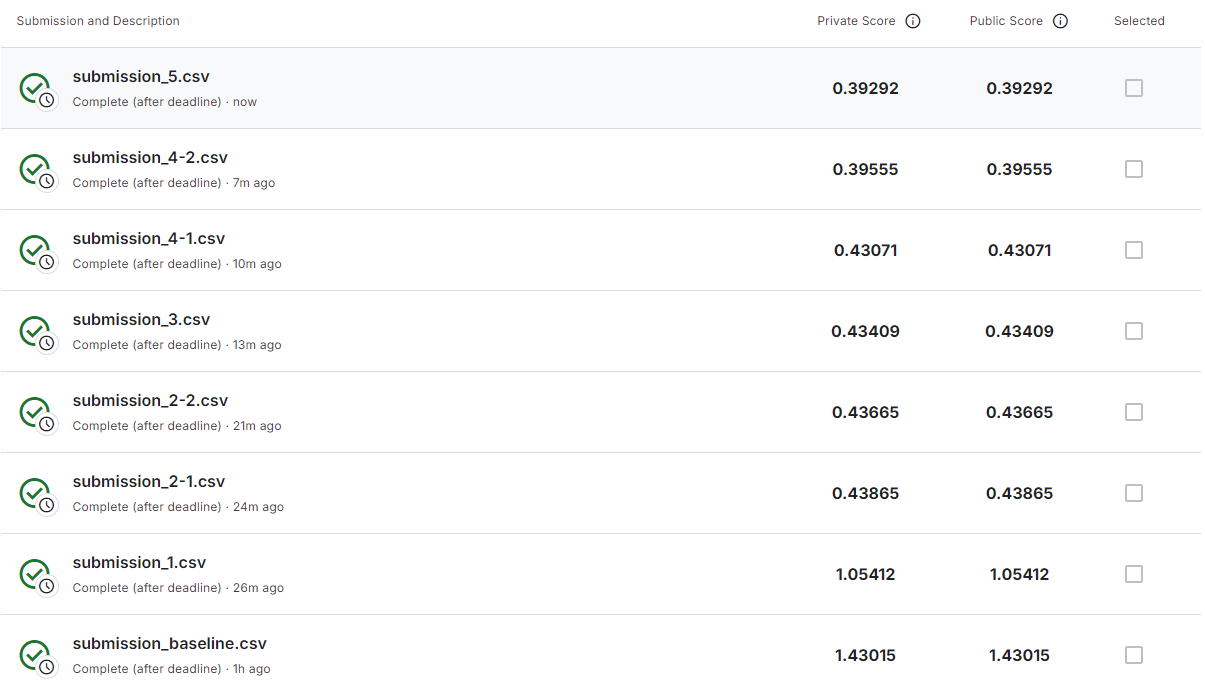

In [132]:
submission_df['count'] = y_test_pred
submission_df.to_csv('submission_5.csv', index=False)